In [1]:
%config Completer.use_jedi = False
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from pandas.api.types import CategoricalDtype
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
from pylab import cm
from matplotlib.cbook import boxplot_stats

from pprint import pprint
from IPython.display import display, HTML

#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),red1+gb2+yg1))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))


sns.set_palette(cp2)
sns.color_palette()

sns.set_palette(cp2v1)
sns.color_palette()

sns.set_palette(cp3)
sns.color_palette()

cpbasic = list(map(lambda x: sns.desaturate(x,0.9),['g','r','b','orange','grey']))
sns.set_palette(cpbasic)
sns.color_palette()

sns.set_palette("Dark2", 7)
sns.color_palette()

colors = cm.get_cmap('PuRd',  5)
colors_dark = cm.get_cmap('Dark2',  5)
viridis = cm.get_cmap('viridis',  4)
magma = cm.get_cmap('magma',  8)
cp6 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), gb7[4], red7[2], magma(6),  viridis(3), yg7[0]]))



# Tesla-V100  colors(2)
# Tesla-A100  gb7[4] 
# AMD-HAWK    red7[2] 
# AMD-EPYC1   magma(6)
# ARM-NEON    viridis(3)
# POWER9      colors_dark(1)
# Alveo-U280  yg7[0]
cp7 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), gb7[4], red7[2], magma(6),  viridis(3), colors_dark(1), yg7[0]]))

sns.set_palette(cp7)
sns.color_palette()

cp3_special = list(map(lambda x: sns.desaturate(x,0.9),[magma(6), red1[0], yg1[0]]))
cp2_special = list(map(lambda x: sns.desaturate(x,0.9),[red1[0], yg1[0]])) # magma(6)

In [2]:
font=7
plt.rc('font', family='serif', serif='TimesNewRoman', size=font)
#plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('legend', fontsize=font)
plt.rc('axes', labelsize=font)
# plt.rcParams.update({'axes.titlesize': font})
# plt.rcParams["figure.autolayout"] = True

In [3]:
# "dodge" argument explained here -> https://stackoverflow.com/questions/49078697/seaborn-boxplots-shifted-incorrectly-along-x-axis 
def harry_plotter(type, plot_df, plot_x_axis_list, plot_y_axis_list, select_str, plot_id, 
                  rotation = 30, adj_left = .1, adj_bottom = .2, adj_right = .99, adj_top = .88, 
                  no_sort=False, hue_hue = 'None', hue_hue_order = [], dodge=True, no_legend=False, no_title=True,
                  no_x_axis=False, no_x_axis_title=False,
                  secondary_axis=False, plot_secondary_y_itter = '', secondary_data = [], secondary_annot = []):
    for plot_x_itter in plot_x_axis_list:
        if no_sort:
            plot_df_sorted = plot_df
        else:
            dataTypeX = plot_df[plot_x_itter].dtype
            if dataTypeX == np.float64 or dataTypeX == np.int64 or dataTypeX == float or dataTypeX == int:
                plot_df_sorted = plot_df.sort_values(plot_x_itter)
            elif plot_x_itter == 'mem_range':
                plot_df_sorted = plot_df
                cat_mem_range = CategoricalDtype(["[4-8]", "[8-16]", "[16-32]", "[32-64]", "[64-128]", "[128-256]", "[256-512]", "[512-1024]", "[1024-2048]"], ordered=True)
                pd.options.mode.chained_assignment = None # https://stackoverflow.com/a/49729413
                plot_df_sorted["mem_range"] = plot_df_sorted["mem_range"].astype(cat_mem_range)
                plot_df_sorted = plot_df_sorted.sort_values('mem_range')                
            else:
                plot_df_sorted = plot_df
                if plot_x_itter == 'impl_arch':
                    cat_it = CategoricalDtype(ranges_impl_arch, ordered=True)
                    plot_df_sorted[plot_x_itter] = plot_df_sorted[plot_x_itter].astype(cat_it)
                    plot_df_sorted = plot_df_sorted.sort_values(plot_x_itter)
                elif plot_x_itter == 'System':
                    cat_it = CategoricalDtype(ranges_dev, ordered=True)
                    plot_df_sorted[plot_x_itter] = plot_df_sorted[plot_x_itter].astype(cat_it)
                    plot_df_sorted = plot_df_sorted.sort_values(plot_x_itter)
                else:
                    print("Warning: X not sorted: dtype = %s" % (dataTypeX))
        for plot_y_itter in plot_y_axis_list:
            fig, axs = plt.subplots()
            if hue_hue == 'None':
                if(type == 'violin'):
                    sns_plot = sns.violiplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs, dodge=dodge)
                elif(type == 'scatter'):
                    sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs)
                elif(type == 'box'):
                    sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs, dodge=dodge)
            else:
                if(hue_hue_order != []):
                    if(type == 'violin'):
                        sns_plot = sns.violinplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs, dodge=dodge)
                    if(type == 'scatter'):
                        sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs)
                    if(type == 'box'):
                        sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs, dodge=dodge)
                else:
                    if(type == 'violin'):
                        sns_plot = sns.violinplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs, dodge=dodge)
                    if(type == 'scatter'):
                        sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs)
                    if(type == 'box'):
                        sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs, dodge=dodge)

            if(hue_hue_order != []):               
                # reordering the labels
                handles, labels = plt.gca().get_legend_handles_labels()
                order = [labels.index(i) for i in hue_hue_order]
                plt.legend([handles[i] for i in order], [labels[i] for i in order], 
                           title = hue_hue.replace("_categ",""), fancybox=True)

            if(no_legend==True):
                axs.get_legend().remove()
            else:
                #remove title from Legend
                handles, labels = axs.get_legend_handles_labels()
                axs.legend(handles=handles[0:], labels=labels[0:])
                axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=len(ranges_dev))

            if(plot_x_itter == 'impl_arch'):
                labels = [item.get_text().split("\n")[1] for item in axs.get_xticklabels()]
                axs.set_xticklabels(labels)

            if(plot_y_itter == 'energy_efficiency'):
                # axs.set_ylabel("Energy Efficiency (GFLOPs/W)")
                axs.set_ylabel("GFLOPs/W")
                # I set this limit as some outliers ( from Vectorized CSR ) caused it to reach 2.5
                # and compared to other devices, offered nothing more
                axs.set_ylim(bottom = 0, top=1.4)
            elif(plot_y_itter == 'GFLOPs^2-per-W'):
                # axs.set_ylabel("Energy Efficiency (GFLOPs/W)")
                axs.set_ylabel("GFLOPs^2/W")
            elif(plot_y_itter == 'gflops'):
                # axs.set_ylabel("Performance (GFLOPs)")
                axs.set_ylabel("GFLOPs")

            if(no_title==False):
                # axs.set_title('Select: %s' %(select_str))
                axs.set_title('%s' %(select_str))

            if(no_x_axis_title==True):
                axs.set_xlabel("")
            if(no_x_axis==True):
                axs.set_xticklabels([])
                axs.set_xlabel("")
                axs.set_xticks([], minor=False)#, major=False)
                
            if(secondary_axis==True):
                axs2 = axs.twinx()
                axs2.bar(range(0, len(secondary_data)), height=secondary_data,align='center', width = 0.6, alpha=0.1)
                if(plot_secondary_y_itter == 'mem_bw'):
                    axs2.set_ylabel("Memory Bandwidth (GB/s)")
                if(secondary_annot != []):
                    items = axs.get_xticklabels()
                    labels = [items[i].get_text() + '\n' + '(' + str(secondary_annot[i]) + '% peak performance)'  for i in range(len(items))]
                    axs.set_xticklabels(labels)

            fig.subplots_adjust(left=adj_left, bottom=adj_bottom, right=adj_right, top=adj_top)
            plt.xticks(rotation=rotation)
            select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
            plt.tight_layout()
            fig.savefig('./New_plots/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_itter, plot_y_itter))
            plt.close()

# Read GPU Data (panastas)

In [4]:
header_names = ['mtx_name','distribution','placement','seed',
                'm','n','nz','density','A_mem_footprint','mem_range',
                'avg_nz_row','std_nz_row',
                'avg_bandwidth','std_bandwidth','avg_bandwidth_scaled','std_bandwidth_scaled',
                'avg_scattering','std_scattering','avg_scattering_scaled','std_scattering_scaled',
                'skew_coeff','avg_num_neighbours','cross_row_similarity',
                'implementation','time','gflops','W_avg','J_estimated', 'System', 'Arch','friends']

In [5]:
#Unified read
# fname = "silver1-TeslaV100_dtype-%s_run_full_dataset.csv" % dtype
# inputdata_GPU = pd.read_csv('../Benchmarks/%s' % fname, names = header_names, sep=',')

# inputdata_GPU_V100_friends = pd.read_csv('../benchmark_results/vulcan-V100/vulcan-V100_dtype-D_run_friend_dataset.csv', names = header_names)
inputdata_GPU_V100_synthetic = pd.read_csv('../benchmark_results/vulcan-V100/vulcan-V100_dtype-D_run_full_dataset.csv', names = header_names)

# inputdata_GPU_V100_friends['friends'] = True
inputdata_GPU_V100_synthetic['friends'] = False
# inputdata_GPU_V100 = pd.concat([inputdata_GPU_V100_friends, inputdata_GPU_V100_synthetic])
inputdata_GPU_V100 = pd.concat([inputdata_GPU_V100_synthetic])
inputdata_GPU_V100['System'] = 'Tesla-V100'


# # inputdata_GPU_P100_friends = pd.read_csv('../benchmark_results/vulcan-P100/vulcan-P100_dtype-D_run_friend_dataset.csv', names = header_names)
# inputdata_GPU_P100_synthetic = pd.read_csv('../benchmark_results/vulcan-P100/vulcan-P100_dtype-D_run_full_dataset.csv', names = header_names)

# # inputdata_GPU_P100_friends['friends'] = True
# inputdata_GPU_P100_synthetic['friends'] = False
# # inputdata_GPU_P100 = pd.concat([inputdata_GPU_P100_friends, inputdata_GPU_P100_synthetic])
# inputdata_GPU_P100 = pd.concat([inputdata_GPU_P100_synthetic])
# inputdata_GPU_P100['System'] = 'Tesla-P100'


# inputdata_GPU_A100_friends = pd.read_csv('../benchmark_results/epyc5-A100/epyc5-A100_dtype-D_run_friend_dataset.csv', names = header_names)
inputdata_GPU_A100_synthetic = pd.read_csv('../benchmark_results/epyc5-A100/epyc5-A100_dtype-D_run_synthetic_matrices_small_dataset.csv', names = header_names)

# inputdata_GPU_A100_friends['friends'] = True
inputdata_GPU_A100_synthetic['friends'] = False
# inputdata_GPU_A100 = pd.concat([inputdata_GPU_A100_friends, inputdata_GPU_A100_synthetic])
inputdata_GPU_A100 = pd.concat([inputdata_GPU_A100_synthetic])
inputdata_GPU_A100['System'] = 'Tesla-A100'

# inputdata_GPU = pd.concat([inputdata_GPU_V100, inputdata_GPU_P100, inputdata_GPU_A100])
inputdata_GPU = pd.concat([inputdata_GPU_V100, inputdata_GPU_A100])
inputdata_GPU['Arch'] = 'GPU'

print(inputdata_GPU.shape)
# inputdata_GPU = inputdata_GPU[inputdata_GPU['implementation']!='CSR5_9']
# print(inputdata_GPU.shape)
# print(inputdata_GPU.head(2))
print(set(inputdata_GPU['implementation']))


# poulo_list=['Merge_11']
poulo_list=[]
for impl_poulo in poulo_list:
    inputdata_GPU = inputdata_GPU[inputdata_GPU.implementation != impl_poulo]

for sys in set(inputdata_GPU['System']):
    inputdata_GPU_sys = inputdata_GPU[inputdata_GPU['System']==sys]
    print(sys, '\t', set(inputdata_GPU_sys['implementation']))

# inputdata_GPU = inputdata_GPU.round({'nz': -1, 'A_mem_footprint': 3, 'density': 3,
#              'avg_nnz_row': 3, 'std_nnz_row': 3,
#              'avg_bandwidth': -1, 'std_bandwidth': -1, 'avg_bandwidth_scaled': 2, 'std_bandwidth_scaled': 2,
#              'avg_scattering': 2, 'std_scattering': 2, 'avg_scattering_scaled': -1, 'std_scattering_scaled': -1,
#              'skew_coeff': 1,
#              'avg_num_neighbours' : 3, 'cross_row_similarity': 3})

(472292, 31)
{'cuSPARSE_hyb9-2', 'cuSPARSE_csr11', 'CSR5_9', 'cuSPARSE_coo11', 'SELL-32-1', 'Merge_11'}
Tesla-P100 	 {'cuSPARSE_coo11', 'cuSPARSE_hyb9-2', 'cuSPARSE_csr11', 'CSR5_9'}
Tesla-A100 	 {'Merge_11', 'SELL-32-1', 'cuSPARSE_coo11', 'cuSPARSE_csr11'}
Tesla-V100 	 {'cuSPARSE_coo11', 'cuSPARSE_hyb9-2', 'cuSPARSE_csr11', 'CSR5_9'}


# Read CPU Data (dgal)

In [6]:
Hawk_threads = 64
Epyc_threads = 24
Xeon_threads = 14
Arm_threads = 80
Power9_threads = 32

# inputdata_CPU_AMD_HAWK_friends = pd.read_csv('../benchmark_results/amd-hawk/amd-hawk_friends_10_samples_30_range_t%d_d.csv' % Hawk_threads, names=header_names)
inputdata_CPU_AMD_HAWK_synthetic = pd.read_csv('../benchmark_results/amd-hawk/amd-hawk_synthetic_t%d_d.csv' % Hawk_threads, names=header_names)

# inputdata_CPU_AMD_HAWK_friends['friends'] = True
inputdata_CPU_AMD_HAWK_synthetic['friends'] = False
# inputdata_CPU_AMD_HAWK = pd.concat([inputdata_CPU_AMD_HAWK_friends, inputdata_CPU_AMD_HAWK_synthetic])
inputdata_CPU_AMD_HAWK = pd.concat([inputdata_CPU_AMD_HAWK_synthetic])
inputdata_CPU_AMD_HAWK['System'] = 'AMD-HAWK'


# inputdata_CPU_AMD_EPYC1_friends = pd.read_csv('../benchmark_results/amd-epyc1/amd-epyc1_friends_10_samples_30_range_t%d_d.csv' % Epyc_threads, names=header_names)
inputdata_CPU_AMD_EPYC1_synthetic = pd.read_csv('../benchmark_results/amd-epyc1/amd-epyc1_synthetic_t%d_d.csv' % Epyc_threads, names=header_names)

# inputdata_CPU_AMD_EPYC1_friends['friends'] = True
inputdata_CPU_AMD_EPYC1_synthetic['friends'] = False
# inputdata_CPU_AMD_EPYC1 = pd.concat([inputdata_CPU_AMD_EPYC1_friends, inputdata_CPU_AMD_EPYC1_synthetic])
inputdata_CPU_AMD_EPYC1 = pd.concat([inputdata_CPU_AMD_EPYC1_synthetic])
inputdata_CPU_AMD_EPYC1['System'] = 'AMD-EPYC1'


# # inputdata_CPU_INTEL_GOLD2_friends = pd.read_csv('../benchmark_results/intel-gold2/intel-gold2_friends_10_samples_30_range_t%d_d.csv' % Xeon_threads, names=header_names)
# inputdata_CPU_INTEL_GOLD2_synthetic = pd.read_csv('../benchmark_results/intel-gold2/intel-gold2_synthetic_t%d_d.csv' % Xeon_threads, names=header_names)

# # inputdata_CPU_INTEL_GOLD2_friends['friends'] = True
# inputdata_CPU_INTEL_GOLD2_synthetic['friends'] = False
# # inputdata_CPU_INTEL_GOLD2 = pd.concat([inputdata_CPU_INTEL_GOLD2_friends, inputdata_CPU_INTEL_GOLD2_synthetic])
# inputdata_CPU_INTEL_GOLD2 = pd.concat([inputdata_CPU_INTEL_GOLD2_synthetic])
# inputdata_CPU_INTEL_GOLD2['System'] = 'INTEL-GOLD2'


# inputdata_CPU_ARM_friends = pd.read_csv('../benchmark_results/arm/arm_friends_10_samples_30_range_t%d_d.csv' % Arm_threads, names=header_names)
inputdata_CPU_ARM_synthetic = pd.read_csv('../benchmark_results/arm/arm_synthetic_t%d_d.csv' % Arm_threads, names=header_names)

# inputdata_CPU_ARM_friends['friends'] = True
inputdata_CPU_ARM_synthetic['friends'] = False
# inputdata_CPU_ARM = pd.concat([inputdata_CPU_ARM_friends, inputdata_CPU_ARM_synthetic])
inputdata_CPU_ARM = pd.concat([inputdata_CPU_ARM_synthetic])
inputdata_CPU_ARM['System'] = 'ARM-NEON'

# inputdata_CPU_POWER9_friends = pd.read_csv('../benchmark_results/power9-m100/power9-m100_friends_10_samples_30_range_t%d_d.csv' % Power9_threads, names=header_names)
inputdata_CPU_POWER9_synthetic = pd.read_csv('../benchmark_results/power9-m100/power9-m100_synthetic_t%d_d.csv' % Power9_threads, names=header_names)

# inputdata_CPU_POWER9_friends['friends'] = True
inputdata_CPU_POWER9_synthetic['friends'] = False
# inputdata_CPU_POWER9 = pd.concat([inputdata_CPU_POWER9_friends, inputdata_CPU_POWER9_synthetic])
inputdata_CPU_POWER9 = pd.concat([inputdata_CPU_POWER9_synthetic])
inputdata_CPU_POWER9['System'] = 'POWER9'
inputdata_CPU_POWER9['W_avg'] = 200

# inputdata_CPU = pd.concat([inputdata_CPU_AMD_HAWK, inputdata_CPU_AMD_EPYC1, inputdata_CPU_INTEL_GOLD2, inputdata_CPU_ARM, inputdata_CPU_POWER9])

inputdata_CPU = pd.concat([inputdata_CPU_AMD_HAWK, inputdata_CPU_AMD_EPYC1, 
                           inputdata_CPU_ARM, inputdata_CPU_POWER9])
inputdata_CPU['Arch'] = 'CPU'    

print(inputdata_CPU.shape)
# print(inputdata_CPU.head(2))
print(set(inputdata_CPU['implementation']))


# poulo_list=['SparseX', 'SELL-32-1']
# poulo_list=['SparseX']
poulo_list=[]
for impl_poulo in poulo_list:
    inputdata_CPU = inputdata_CPU[inputdata_CPU.implementation != impl_poulo]

for sys in set(inputdata_CPU['System']):
    inputdata_CPU_sys = inputdata_CPU[inputdata_CPU['System']==sys]
    print(sys, '\t', set(inputdata_CPU_sys['implementation']))


# inputdata_CPU = inputdata_CPU.round({'nz': -1, 'A_mem_footprint': 3, 'density': 3,
#              'avg_nnz_row': 3, 'std_nnz_row': 3,
#              'avg_bandwidth': -1, 'std_bandwidth': -1, 'avg_bandwidth_scaled': 2, 'std_bandwidth_scaled': 2,
#              'avg_scattering': 2, 'std_scattering': 2, 'avg_scattering_scaled': -1, 'std_scattering_scaled': -1,
#              'skew_coeff': 1,
#              'avg_num_neighbours' : 3, 'cross_row_similarity': 3})

(1447543, 31)
{'MKL_IE', 'AOCL_OPTMV', 'Custom_CSR_BV', 'Custom_CSR_B', 'ARMPL', 'Custom_CSR_BV_x86', 'Naive_CSR_CPU', 'MERGE', 'CSR5', 'SELL-32-1', 'SparseX'}
AMD-HAWK 	 {'MKL_IE', 'Naive_CSR_CPU', 'CSR5'}
POWER9 	 {'Custom_CSR_BV', 'Custom_CSR_B', 'Naive_CSR_CPU', 'MERGE', 'SparseX'}
AMD-EPYC1 	 {'MKL_IE', 'AOCL_OPTMV', 'Custom_CSR_BV_x86', 'Naive_CSR_CPU', 'MERGE', 'CSR5', 'SELL-32-1', 'SparseX'}
ARM-NEON 	 {'ARMPL', 'Naive_CSR_CPU', 'MERGE', 'SELL-32-1', 'SparseX'}
INTEL-GOLD2 	 {'MKL_IE', 'Custom_CSR_BV_x86', 'Naive_CSR_CPU', 'MERGE', 'CSR5', 'SELL-32-1', 'SparseX'}


# Read FPGA Data (pmpakos)

In [7]:
# inputdata_FPGA_friends = pd.read_csv('../benchmark_results/alveo-u280/alveo-u280_spmv_validation_matrices_10_samples_30_range_twins_dtype-D.csv', names = header_names)
inputdata_FPGA_synthetic = pd.read_csv('../benchmark_results/alveo-u280/alveo-u280_spmv_4-2048_dtype-D.csv', names = header_names)

# inputdata_FPGA_friends['friends'] = True
inputdata_FPGA_synthetic['friends'] = False
# inputdata_FPGA = pd.concat([inputdata_FPGA_friends, inputdata_FPGA_synthetic])
inputdata_FPGA = pd.concat([inputdata_FPGA_synthetic])
inputdata_FPGA['System'] = 'Alveo-U280'
inputdata_FPGA['Arch'] = 'FPGA'
print(inputdata_FPGA.shape)
# print(inputdata_FPGA.head(2))
print(set(inputdata_FPGA['implementation']))

(55457, 31)
{'Xilinx_SpMV'}


# Concatenate all data, place in *inputdata* dataframe

In [8]:
%%time
# Merge the results
inputdata = pd.concat([inputdata_GPU,inputdata_CPU,inputdata_FPGA])
print(inputdata.shape)

# keep "synthetic" dataset only (discard "friends")
inputdata = inputdata[inputdata['friends'] == False]
print(inputdata.shape)

# Group per reps, take mean
groupreps = inputdata.groupby(['mtx_name','distribution','placement','seed',
                               'm','n','nz','density','A_mem_footprint','mem_range',
                               'avg_nz_row','std_nz_row',
                               'avg_bandwidth','std_bandwidth','avg_bandwidth_scaled','std_bandwidth_scaled',
                               'avg_scattering','std_scattering','avg_scattering_scaled','std_scattering_scaled',
                               'skew_coeff','avg_num_neighbours','cross_row_similarity',
                               'implementation','System', 'Arch','friends']).mean().reset_index().reindex(columns=header_names)

# dataTypeSeries = groupreps.dtypes
# print('Data type of each column of Dataframe :')
# print(dataTypeSeries)
print(groupreps.shape)

(1655999, 31)
(551354, 31)
CPU times: user 3.5 s, sys: 600 ms, total: 4.1 s
Wall time: 4.12 s


# FIX NAMES OF IMPLEMENTATIONS

In [9]:
groupreps.loc[(groupreps['implementation'] == "cuSPARSE_coo11"), "implementation"] = "cuSPARSE-COO"
groupreps.loc[(groupreps['implementation'] == "cuSPARSE_csr11"), "implementation"] = "cuSPARSE-CSR"
groupreps.loc[(groupreps['implementation'] == "cuSPARSE_hyb9-2"), "implementation"] = "cuSPARSE-HYB"
groupreps.loc[(groupreps['implementation'] == "CSR5_9"), "implementation"] = "CSR5"
groupreps.loc[(groupreps['implementation'] == "Merge_11"), "implementation"] = "Merge"
groupreps.loc[(groupreps['implementation'] == "Naive_CSR_CPU"), "implementation"] = "Naive-CSR"
groupreps.loc[(groupreps['implementation'] == "Custom_CSR_BV_x86"), "implementation"] = "Vectorized-CSR"    
groupreps.loc[(groupreps['implementation'] == "Custom_CSR_BV"), "implementation"] = "Vectorized-CSR"
groupreps.loc[(groupreps['implementation'] == "Custom_CSR_B"), "implementation"] = "Balanced-CSR"    
groupreps.loc[(groupreps['implementation'] == "MKL_IE_no_hint"), "implementation"] = "MKL-IE-no-hint"
groupreps.loc[(groupreps['implementation'] == "MKL_IE"), "implementation"] = "MKL-IE"
groupreps.loc[(groupreps['implementation'] == "AOCL_OPTMV"), "implementation"] = "AOCL"
groupreps.loc[(groupreps['implementation'] == "SparseX"), "implementation"] = "SparseX"
groupreps.loc[(groupreps['implementation'] == "SELL-32-1"), "implementation"] = "SELL-C-s"
groupreps.loc[(groupreps['implementation'] == "MERGE"), "implementation"] = "Merge"
# groupreps.loc[(groupreps['implementation'] == "ARM_library"), "implementation"] = "ARM-library"
groupreps.loc[(groupreps['implementation'] == "ARMPL"), "implementation"] = "ARM-library"
groupreps.loc[(groupreps['implementation'] == "Xilinx_SpMV"), "implementation"] = "Xilinx-library"

In [10]:
def set_category(x, cat_list, cat_size, ranges_size_flag=False):
    for index in range(len(cat_list)):
        cat = cat_list[index]
        cat_min = float(cat.strip("[").strip("]").split("-")[0])
        cat_max = float(cat.strip("[").strip("]").split("-")[1])
        # print(cat_min, cat_max,'->\t->', x)
        if(x>cat_min and x<=cat_max):
            if(ranges_size_flag==True):
                return cat_size[index]
            else:
                return cat_list[index]

# ranges_arch = ["GPU", "GPU", "GPU", "CPU", "CPU", "FPGA"]
ranges_arch = ["GPU", "GPU", "GPU", "CPU", "CPU", "CPU", "CPU", "FPGA"]

# ranges_dev = ["Tesla-V100", "Tesla-P100", "Tesla-A100", "AMD-EPYC", "ARM-NEON", "Alveo-U280"]
# ranges_dev = ["Tesla-V100", "Tesla-P100", "Tesla-A100", "AMD-EPYC", "ARM-NEON", "Alveo-U280"]
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ["Tesla-P100", "Tesla-V100", "Tesla-A100", "AMD-HAWK", "AMD-EPYC1", "ARM-NEON", "POWER9", "Alveo-U280"]

# '( Tesla-V100 )\ncuSPARSE-COO', '( Tesla-V100 )\ncuSPARSE-CSR', '( Tesla-V100 )\nCSR5', '( Tesla-V100 )\ncuSPARSE-HYB',
# '( Tesla-P100 )\ncuSPARSE-COO', '( Tesla-P100 )\ncuSPARSE-CSR', '( Tesla-P100 )\nCSR5', '( Tesla-P100 )\ncuSPARSE-HYB',
# '( AMD-EPYC )\nNaive-CSR',  '( AMD-EPYC )\nCSR5',  '( AMD-EPYC )\nMKL-IE',
ranges_impl_arch = ['( Tesla-P100 )\ncuSPARSE-COO', '( Tesla-P100 )\ncuSPARSE-CSR', '( Tesla-P100 )\ncuSPARSE-HYB', 
                    '( Tesla-P100 )\nCSR5',

                    '( Tesla-V100 )\ncuSPARSE-COO', '( Tesla-V100 )\ncuSPARSE-CSR', '( Tesla-V100 )\ncuSPARSE-HYB', 
                    '( Tesla-V100 )\nCSR5',

                    '( Tesla-A100 )\ncuSPARSE-COO', '( Tesla-A100 )\ncuSPARSE-CSR', 
                    '( Tesla-A100 )\nMerge', '( Tesla-A100 )\nSELL-C-s',

                    '( AMD-HAWK )\nNaive-CSR',
                    '( AMD-HAWK )\nMKL-IE',  '( AMD-HAWK )\nCSR5', 

                    '( AMD-EPYC1 )\nNaive-CSR',  '( AMD-EPYC1 )\nVectorized-CSR',  
                    '( AMD-EPYC1 )\nAOCL', '( AMD-EPYC1 )\nMKL-IE', 
                    '( AMD-EPYC1 )\nCSR5', '( AMD-EPYC1 )\nSparseX', '( AMD-EPYC1 )\nMerge', '( AMD-EPYC1 )\nSELL-C-s', 
                    
                    # '( INTEL-GOLD2 )\nNaive-CSR',  '( INTEL-GOLD2 )\nVectorized-CSR',  
                    # '( INTEL-GOLD2 )\nMKL-IE',
                    # '( INTEL-GOLD2 )\nCSR5', '( INTEL-GOLD2 )\nSparseX', '( INTEL-GOLD2 )\nMerge', '( INTEL-GOLD2 )\nSELL-C-s',                    

                    '( ARM-NEON )\nNaive-CSR',
                    '( ARM-NEON )\nARM-library', 
                    '( ARM-NEON )\nSparseX', '( ARM-NEON )\nMerge', '( ARM-NEON )\nSELL-C-s', 

                    '( POWER9 )\nNaive-CSR', '( POWER9 )\nBalanced-CSR', '( POWER9 )\nVectorized-CSR', 
                    # '( POWER9 )\nSparseX', '( POWER9 )\nMerge',
                    
                    '( Alveo-U280 )\nXilinx-library']

ranges_impl_arch_backup = ranges_impl_arch

# ranges_memr = ["[2-32]", "[32-512]", "[512-2048]"] # A_mem_footprint
ranges_memr = ["[4-8]","[8-16]","[16-32]","[32-64]","[64-128]","[128-256]","[256-512]","[512-1024]","[1024-2048]"] # A_mem_footprint
# ranges_rows = ["[0-100000]", "[100000-1000000]","[1000000-30000000]"] # m (nr_rows)
ranges_anr = ["[0-20]", "[20-75]","[75-150]", "[150-510]"] # avg_nz_row
ranges_anr = ["[0-15]", "[15-40]", "[40-75]","[75-150]", "[150-510]"] # avg_nz_row

# ranges_skew = ["[0-100]", "[100-500]", "[500-2000]", "[2000-180000]"] # skew_coeff

ranges_skew = ["[0-1.5]", "[1.5-50]", "[50-250]", "[250-3000]", "[3000-180000]"] # skew_coeff

ranges_ann = ["[0-0.6]", "[0.6-1.4]", "[1.4-2]"] # avg_num_neighbours
ranges_crs = ["[0-0.3]", "[0.3-0.7]", "[0.7-1]"] # cross_row_similarity

ranges_size = ['S', 'M', 'L']
ranges_regularity = ['SS', 'SM', 'SL', 'MS', 'MM', 'ML', 'LS', 'LM', 'LL']

cat_list = ['A_mem_footprint',  # 'm', 
            'avg_nz_row',
            'skew_coeff','avg_num_neighbours','cross_row_similarity']
ranges_list = [ranges_memr, # ranges_rows, 
               ranges_anr, 
               ranges_skew, 
               ranges_ann, ranges_crs]


# add some extra columns to dataframe

In [11]:
groupreps_backup = groupreps

In [12]:
groupreps = groupreps_backup

In [13]:
group_system_best = groupreps

---
# Group by "best-of" implementation for each device
# skip this step if you want to plot every measurement collected

In [14]:
print(groupreps.columns)

Index(['mtx_name', 'distribution', 'placement', 'seed', 'm', 'n', 'nz',
       'density', 'A_mem_footprint', 'mem_range', 'avg_nz_row', 'std_nz_row',
       'avg_bandwidth', 'std_bandwidth', 'avg_bandwidth_scaled',
       'std_bandwidth_scaled', 'avg_scattering', 'std_scattering',
       'avg_scattering_scaled', 'std_scattering_scaled', 'skew_coeff',
       'avg_num_neighbours', 'cross_row_similarity', 'implementation', 'time',
       'gflops', 'W_avg', 'J_estimated', 'System', 'Arch', 'friends'],
      dtype='object')


In [15]:
%%time
# Group per system, take best (it was over "inputdata", but "groupreps" is better choice I think)
# fixed this after reordering groupreps columns according to header_names
# before this, columns and data were mixed and it was a complete shitstorm
group_system = groupreps.groupby(['mtx_name','distribution','placement','seed',
                                  'm','n','nz','density','A_mem_footprint','mem_range',
                                  'avg_nz_row','std_nz_row',
                                  'avg_bandwidth','std_bandwidth','avg_bandwidth_scaled','std_bandwidth_scaled',
                                  'avg_scattering','std_scattering','avg_scattering_scaled','std_scattering_scaled',
                                  'skew_coeff','avg_num_neighbours','cross_row_similarity',
                                  'System','Arch','friends'], as_index = False)
reslist = []
for desc, experiment in group_system:
    best_format = experiment['implementation'].iloc[experiment['gflops'].argmax()]
    outrow = experiment[experiment['implementation'] == best_format]
    # if(len(outrow)>1):
    #     print(len(outrow), outrow)
    reslist.append(outrow.values.tolist()[0])             

group_system_best = pd.DataFrame(reslist, columns = header_names)
print(group_system_best.shape)

(124688, 31)
CPU times: user 2min 19s, sys: 669 ms, total: 2min 20s
Wall time: 2min 22s


In [16]:
%%time
# groupreps = groupreps[groupreps['W_avg']>0]
groupreps1 = groupreps[groupreps['System'] == 'POWER9']
groupreps2 = groupreps[groupreps['System'] != 'POWER9'] 
groupreps2 = groupreps2[groupreps2['W_avg']>0]
groupreps = pd.concat([groupreps1, groupreps2])

groupreps1 = groupreps[groupreps['System'] != 'AMD-HAWK']
groupreps2 = groupreps[groupreps['System'] == 'AMD-HAWK'] 
groupreps2 = groupreps2[groupreps2['W_avg']>30]
groupreps = pd.concat([groupreps1, groupreps2])
# groupreps = groupreps[groupreps['W_avg']>32.9]

groupreps['impl_arch'] = "( " + groupreps['System'] + " " ")\n" + groupreps['implementation']
groupreps['energy_efficiency'] = groupreps['gflops'] / groupreps['W_avg'] 
groupreps['GFLOPs^2-per-W'] = groupreps['gflops'] * groupreps['gflops'] / groupreps['W_avg']


groupreps['crs_categ'] = groupreps.apply (lambda row: set_category(row['cross_row_similarity'], ranges_crs, ranges_size, ranges_size_flag=True), axis=1)
groupreps['ann_categ'] = groupreps.apply (lambda row: set_category(row['avg_num_neighbours'], ranges_ann, ranges_size, ranges_size_flag=True), axis=1)
groupreps['regularity'] = groupreps['crs_categ'] + groupreps['ann_categ']

groupreps['anr_categ'] = groupreps.apply (lambda row: set_category(row['avg_nz_row'], ranges_anr, ranges_size, ranges_size_flag=False), axis=1)
groupreps['skew_categ'] = groupreps.apply (lambda row: set_category(row['skew_coeff'], ranges_skew, ranges_size, ranges_size_flag=False), axis=1)

CPU times: user 28 s, sys: 1.89 s, total: 29.9 s
Wall time: 29.9 s


In [17]:
%%time
# group_system_best = group_system_best[group_system_best['W_avg']>0]
group_system_best1 = group_system_best[group_system_best['System'] == 'POWER9']
group_system_best2 = group_system_best[group_system_best['System'] != 'POWER9'] 
group_system_best2 = group_system_best2[group_system_best2['W_avg']>0]
group_system_best = pd.concat([group_system_best1, group_system_best2])

group_system_best1 = group_system_best[group_system_best['System'] != 'AMD-HAWK']
group_system_best2 = group_system_best[group_system_best['System'] == 'AMD-HAWK'] 
group_system_best2 = group_system_best2[group_system_best2['W_avg']>30]
group_system_best = pd.concat([group_system_best1, group_system_best2])
# group_system_best = group_system_best[group_system_best['W_avg']>32.9]

group_system_best['impl_arch'] = "( " + group_system_best['System'] + " " ")\n" + group_system_best['implementation']
group_system_best['energy_efficiency'] = group_system_best['gflops'] / group_system_best['W_avg'] 
group_system_best['GFLOPs^2-per-W'] = group_system_best['gflops'] * group_system_best['gflops'] / group_system_best['W_avg']


group_system_best['crs_categ'] = group_system_best.apply (lambda row: set_category(row['cross_row_similarity'], ranges_crs, ranges_size, ranges_size_flag=True), axis=1)
group_system_best['ann_categ'] = group_system_best.apply (lambda row: set_category(row['avg_num_neighbours'], ranges_ann, ranges_size, ranges_size_flag=True), axis=1)
group_system_best['regularity'] = group_system_best['crs_categ'] + group_system_best['ann_categ']

group_system_best['anr_categ'] = group_system_best.apply (lambda row: set_category(row['avg_nz_row'], ranges_anr, ranges_size, ranges_size_flag=False), axis=1)
group_system_best['skew_categ'] = group_system_best.apply (lambda row: set_category(row['skew_coeff'], ranges_skew, ranges_size, ranges_size_flag=False), axis=1)


extra_header_names = ['impl_arch', 'energy_efficiency', 'GFLOPs^2-per-W', 
                      'crs_categ', 'ann_categ', 'regularity', 'anr_categ', 'skew_categ']


CPU times: user 6.61 s, sys: 212 ms, total: 6.83 s
Wall time: 6.83 s


---

In [18]:
for system in set(group_system_best['System']):
    group_system_best_s = group_system_best[group_system_best['System']==system]
    print(system,'\t', set(group_system_best_s['implementation']))

AMD-HAWK 	 {'CSR5', 'Naive-CSR', 'MKL-IE'}
POWER9 	 {'Naive-CSR', 'Balanced-CSR'}
AMD-EPYC1 	 {'Naive-CSR', 'MKL-IE', 'Vectorized-CSR', 'CSR5', 'Merge', 'SELL-C-s', 'AOCL', 'SparseX'}
Tesla-V100 	 {'cuSPARSE-COO', 'CSR5', 'cuSPARSE-CSR', 'cuSPARSE-HYB'}
ARM-NEON 	 {'ARM-library', 'Naive-CSR', 'Merge', 'SELL-C-s', 'SparseX'}
INTEL-GOLD2 	 {'Naive-CSR', 'MKL-IE', 'Vectorized-CSR', 'Merge', 'CSR5', 'SELL-C-s', 'SparseX'}
Tesla-A100 	 {'cuSPARSE-COO', 'cuSPARSE-CSR', 'Merge'}
Alveo-U280 	 {'Xilinx-library'}
Tesla-P100 	 {'cuSPARSE-COO', 'CSR5', 'cuSPARSE-CSR', 'cuSPARSE-HYB'}


In [19]:
group_system_best_backup = group_system_best

# If a change has to happen, do it from this point (so you don't have to read the dataset from scratch...)

In [20]:
group_system_best = group_system_best_backup

In [21]:
# feat = 'avg_nz_row'

# group_system_best_test = group_system_best[group_system_best['System']=='Tesla-V100'].round({feat:0})
# group_system_best_test = group_system_best_test[group_system_best_test['avg_nz_row']>1000]
# for val in sorted(set(group_system_best_test[feat])):
#     print(val, '\t', group_system_best_test[group_system_best_test[feat]==val].shape[0])
#     print(val, '\t', group_system_best_test[(group_system_best_test[feat]==val) & (group_system_best_test['System']=='Arm-80')].shape[0])


In [22]:
width = 3.487
height = width/1.618
height3 = width/0.818
plt.rc('figure', figsize=(width,height))

# plt.rc('figure', figsize=(width,height2))
# plt.rc('figure', figsize=(width,height3))

font=5
plt.rc('font', family='serif', serif='Times', size=font)
#plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('legend', fontsize=font)
plt.rc('axes', labelsize=font)
# plt.rcParams.update({'axes.titlesize': font})
# plt.rcParams["figure.autolayout"] = True

---
# wins per format per device

In [23]:
# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-P100', 'Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']

for system in ranges_dev:
    print('---', system, '---')
    group_sys = group_system_best[group_system_best['System']==system]
    print(group_sys.shape)
    implementations = set(group_sys['implementation'])
    sys_shape = group_sys.shape[0]
    for impl in implementations:
        group_sys_impl = group_sys[group_sys['implementation']==impl]
        sys_impl_shape = group_sys_impl.shape[0]
        print(impl, '\t', np.round(sys_impl_shape/sys_shape*100,2), '%')
    print('---')

--- Tesla-P100 ---
(9918, 39)
cuSPARSE-COO 	 24.22 %
CSR5 	 19.72 %
cuSPARSE-CSR 	 20.45 %
cuSPARSE-HYB 	 35.61 %
---
--- Tesla-V100 ---
(12692, 39)
cuSPARSE-COO 	 11.0 %
CSR5 	 29.25 %
cuSPARSE-CSR 	 26.0 %
cuSPARSE-HYB 	 33.75 %
---
--- Tesla-A100 ---
(15049, 39)
cuSPARSE-COO 	 40.31 %
cuSPARSE-CSR 	 56.59 %
Merge 	 3.1 %
---
--- AMD-HAWK ---
(13839, 39)
CSR5 	 22.62 %
Naive-CSR 	 11.03 %
MKL-IE 	 66.36 %
---
--- AMD-EPYC1 ---
(15263, 39)
Naive-CSR 	 0.83 %
MKL-IE 	 18.32 %
Vectorized-CSR 	 31.09 %
CSR5 	 0.48 %
Merge 	 5.1 %
SELL-C-s 	 7.89 %
AOCL 	 5.55 %
SparseX 	 30.73 %
---
--- ARM-NEON ---
(15263, 39)
ARM-library 	 25.84 %
Naive-CSR 	 14.55 %
Merge 	 12.75 %
SELL-C-s 	 5.4 %
SparseX 	 41.46 %
---
--- POWER9 ---
(15263, 39)
Naive-CSR 	 17.7 %
Balanced-CSR 	 82.3 %
---
--- Alveo-U280 ---
(10391, 39)
Xilinx-library 	 100.0 %
---


# Begin plotting

# GPU only comparison (one boxplot per device)
### Also, plot memory bandwidth of each device
### and on x-axis, show percentage of median performance vs max GPU perf


In [24]:
ranges_dev = ['Tesla-P100', 'Tesla-V100', 'Tesla-A100']
cp3_gpu = list(map(lambda x: sns.desaturate(x,0.9),[colors(4), colors(2), gb7[4]]))

sns.set_palette(cp3_gpu)

system2, system = 'System Comparison', ''  
plot_id = system2

select_str = 'GPU_ONLY_Comparison of SpMV Devices-(Performance)'

plot_x_axis = ['System']
plot_y_axis = ['gflops']

groupdata = group_system_best

ranges_impl_arch = [
    x for x in ranges_impl_arch_backup if 
    ((x.split(" )")[0].split("( ")[1] in ranges_dev) and 
     (x.split("\n")[1] in set(groupdata[groupdata['System']==x.split(" )")[0].split("( ")[1]]['implementation'])))]

# harry_plotter('violin', group_system_best_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False)
par=1
par2=1.5
groupdata_GPU = groupdata[groupdata['Arch']=='GPU']

medians = []
maxs = []
bandwidths = [550 ,760, 1935]
gemms = [4700, 7000, 9700]
for sys in ranges_dev:
    groupdata_GPU_sys = groupdata_GPU[groupdata_GPU['System']==sys]
    print(sys, '\tmedian', round(groupdata_GPU_sys['gflops'].median(),0), '\tmax', round(groupdata_GPU_sys['gflops'].max(),0))
    medians.append(groupdata_GPU_sys['gflops'].median())
    maxs.append(groupdata_GPU_sys['gflops'].max())
rel_perf = [round(100*x/y,2) for x,y in zip(medians, gemms)]
for i in range(len(ranges_dev)):
    print(ranges_dev[i], '\t', rel_perf[i], '% of peak performance')

plt.rc('figure', figsize=(width*par2,height*par))
harry_plotter('box', groupdata_GPU, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False,
              no_x_axis_title=True, rotation=60, 
              secondary_axis = True, plot_secondary_y_itter = 'mem_bw', secondary_data = bandwidths, secondary_annot = rel_perf)

sns.set_palette(cp7)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Tesla-P100 	median 44.0 	max 71.0
Tesla-V100 	median 81.0 	max 130.0
Tesla-A100 	median 133.0 	max 220.0
Tesla-P100 	 0.94 % of peak performance
Tesla-V100 	 1.16 % of peak performance
Tesla-A100 	 1.37 % of peak performance


# Total System Comparison (best of each System)
# one boxplot per format

# First, CPU only comparison of formats

In [25]:
# ranges_dev = ['AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON']
ranges_dev = ['AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9']

cp4_cpu = list(map(lambda x: sns.desaturate(x,0.9),[red7[2], magma(6),  viridis(3), colors_dark(1)]))
sns.set_palette(cp4_cpu)

system2, system = 'System Comparison', ''  
plot_id = system2

select_str = 'CPU_ONLY_Comparison of SpMV Implementations-Formats-(Performance)'

plot_x_axis = ['impl_arch']
plot_y_axis = ['gflops']

groupdata = group_system_best

ranges_impl_arch = [
    x for x in ranges_impl_arch_backup if 
    ((x.split(" )")[0].split("( ")[1] in ranges_dev) and 
     (x.split("\n")[1] in set(groupdata[groupdata['System']==x.split(" )")[0].split("( ")[1]]['implementation'])))]


# harry_plotter('violin', group_system_best_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False)
par=1
par2=1.5
groupdata_CPU = groupdata[groupdata['Arch']=='CPU']
plt.rc('figure', figsize=(width*par2,height*par))
harry_plotter('box', groupdata_CPU, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False,
             no_x_axis_title=True, rotation=60)

sns.set_palette(cp7)

# Now all

In [26]:
# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']

# cp5 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), magma(6),  viridis(3), yg7[0], gb7[4]]))
# sns.set_palette(cp5)

ranges_impl_arch = [
    x for x in ranges_impl_arch_backup if 
    ((x.split(" )")[0].split("( ")[1] in ranges_dev) and 
     (x.split("\n")[1] in set(group_system_best[group_system_best['System']==x.split(" )")[0].split("( ")[1]]['implementation'])))]

system2, system = 'System Comparison', '' 
plot_id = system2

select_str = 'Comparison of SpMV Implementations-Formats-(Performance)'

plot_x_axis = ['impl_arch']
plot_y_axis = ['gflops']

groupdata = group_system_best

# harry_plotter('violin', group_system_best, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False)
par=1
par2=1.5

plt.rc('figure', figsize=(width*par2,height*par))
# harry_plotter('box', groupreps, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False,
harry_plotter('box', groupdata, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False,
             no_x_axis_title=True, rotation=60)


select_str = 'Comparison of SpMV Implementations-Formats-(Energy Efficiency)'

plot_x_axis = ['impl_arch']
plot_y_axis = ['energy_efficiency']

# harry_plotter('violin', group_system_best, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False)
# plt.rc('figure', figsize=(width,height*par))
plt.rc('figure', figsize=(width*par2,height*par))
harry_plotter('box', groupdata, plot_x_axis, plot_y_axis, select_str, plot_id, 
              hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False, rotation=60)


# one boxplot per device

In [27]:
# custom_col = [cm.get_cmap('BrBG',  25)(i) for i in range(25)][7]
# cp7 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), red7[2], magma(6), magma(8),  viridis(3),  custom_col, yg7[0], gb7[4]]))
# frac = 0.87
# cp7 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), red7[2], magma(6), tuple(frac*i for i in magma(6)),  viridis(3),  tuple(frac*i for i in viridis(3)), yg7[0], gb7[4]]))

# sns.set_palette(cp7)
# sns.color_palette()

# cp5 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), magma(6),  viridis(3), yg7[0], gb7[4]]))
# sns.set_palette(cp5)
# sns.set_palette(cp6)

# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']    
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']
ranges_impl_arch = [x for x in ranges_impl_arch_backup if 
                    ((x.split(" )")[0].split("( ")[1] in ranges_dev) and 
                     (x.split("\n")[1] in set(group_system_best[group_system_best['System']==x.split(" )")[0].split("( ")[1]]['implementation'])))]

system2, system = 'System Comparison', '' 
plot_id = system2

select_str = 'Comparison of SpMV Devices-(Performance)'

plot_x_axis = ['System']
plot_y_axis = ['gflops']

groupdata = group_system_best

medians = []
maxs = []
bandwidths = [550 ,760, 1935]

gemms = [7000, 9700, 2100, 818, 970, 500, 150] # 2100 for AMD-HAWK is estimation. 500 for power9 too
for sys in ranges_dev:
    groupdata_sys = groupdata[groupdata['System']==sys]
    print(sys, '\tmedian', round(groupdata_sys['gflops'].median(),0), '\tmax', round(groupdata_sys['gflops'].max(),0))
    medians.append(groupdata_sys['gflops'].median())
    maxs.append(groupdata_sys['gflops'].max())
rel_perf = [round(100*x/y,2) for x,y in zip(medians, gemms)]
for i in range(len(ranges_dev)):
    print(ranges_dev[i], '\t', rel_perf[i], '% of peak performance')

# par2 = 0.5
par2 = 0.71
# harry_plotter('violin', groupdata, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False)
par=0.71
# par=1
par3 = 1.5
plt.rc('figure', figsize=(width*par3,height*par*par2))
harry_plotter('box', groupdata, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False, no_legend=True, 
              no_x_axis_title=True, no_x_axis=True)

select_str = 'Comparison of SpMV Devices-(Energy Efficiency)'

plot_x_axis = ['System']
plot_y_axis = ['energy_efficiency']

# harry_plotter('violin', groupdata, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False)
# par=0.75
par=1
plt.rc('figure', figsize=(width*par3,height*par*par2))
harry_plotter('box', groupdata, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False, no_legend=True,
             )
              # no_x_axis_title=True, no_x_axis=True)
              # rotation=0, no_x_axis_title=True)

# select_str = 'Comparison of SpMV Devices-(inverse EDP)'

# plot_x_axis = ['System']
# plot_y_axis = ['GFLOPs^2-per-W']
# # harry_plotter('violin', groupdata, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False)
# # par=0.75
# par=1
# plt.rc('figure', figsize=(width*par3,height*par*par2))
# harry_plotter('box', groupdata, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, dodge=False, no_legend=True,
#              )
#               # rotation=0, no_x_axis_title=True)

Tesla-V100 	median 81.0 	max 130.0
Tesla-A100 	median 133.0 	max 220.0
AMD-HAWK 	median 36.0 	max 168.0
AMD-EPYC1 	median 16.0 	max 103.0
ARM-NEON 	median 21.0 	max 148.0
POWER9 	median 15.0 	max 50.0
Alveo-U280 	median 19.0 	max 30.0
Tesla-V100 	 1.16 % of peak performance
Tesla-A100 	 1.37 % of peak performance
AMD-HAWK 	 1.71 % of peak performance
AMD-EPYC1 	 1.92 % of peak performance
ARM-NEON 	 2.2 % of peak performance
POWER9 	 3.0 % of peak performance
Alveo-U280 	 12.53 % of peak performance


---
# wins per device (performance - energy efficiency)

In [28]:
# group_system_best_iso = group_system_best[(group_system_best['System'] == 'Tesla-V100') \
#                                          |(group_system_best['System'] == 'AMD-EPYC') \
#                                          |(group_system_best['System'] == 'ARM-NEON') \
#                                          |(group_system_best['System'] == 'Alveo-U280')]
group_system_best_iso = group_system_best[(group_system_best['System'] == 'Tesla-V100') \
                                         # |(group_system_best['System'] == 'Tesla-A100') \
                                         |(group_system_best['System'] == 'AMD-HAWK') \
                                         |(group_system_best['System'] == 'AMD-EPYC1') \
                                         |(group_system_best['System'] == 'ARM-NEON') \
                                         |(group_system_best['System'] == 'POWER9') \
                                         |(group_system_best['System'] == 'Alveo-U280')]
print(group_system_best_iso.shape)
# print(group_system_best_iso.columns)

group_system_best_iso = group_system_best_iso.round({"A_mem_footprint":0})
group_system_best_iso = group_system_best_iso.round({"avg_nz_row":2})
group_system_best_iso = group_system_best_iso.round({"skew_coeff":2})

group_system_best_iso2 = group_system_best_iso.groupby(['A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'regularity'], as_index = False)
reslist_gflops, reslist_energy_efficiency = [], []
reslist_gflops2, reslist_energy_efficiency2 = [], []
cnt2, cnt3 = 0, 0
for desc, experiment in group_system_best_iso2:
    # there is a problem that some matrices have different feature values between Systems
    # have to omit those that 
    if(len(set(experiment['System']))>1):
        # print(desc, experiment)
        best_device_gflops = experiment['System'].iloc[experiment['gflops'].argmax()]
        best_device_energy_efficiency = experiment['System'].iloc[experiment['energy_efficiency'].argmax()]
        # print(best_device_gflops) # print(best_device_energy_efficiency)
        outrow_gflops = experiment[experiment['System'] == best_device_gflops]
        outrow_energy_efficiency = experiment[experiment['System'] == best_device_energy_efficiency]
        # print(outrow_gflops) # print(outrow_energy_efficiency)
        # break
        reslist_gflops.append(outrow_gflops.values.tolist()[0])
        reslist_energy_efficiency.append(outrow_energy_efficiency.values.tolist()[0])
    else:
        cnt2+=1
print(cnt2, 'could not be included (Alveo shit)')
print()

group_system_best_gflops = pd.DataFrame(reslist_gflops)#, columns = header_names)
group_system_best_energy_efficiency = pd.DataFrame(reslist_energy_efficiency)#, columns = header_names)
print('gflops wins %')
shape_wins = group_system_best_gflops.shape[0]
print('Tesla-V100', '\t', round(group_system_best_gflops[group_system_best_gflops[28]=='Tesla-V100'].shape[0]/shape_wins*100,2))
# print('Tesla-A100', '\t', round(group_system_best_gflops[group_system_best_gflops[28]=='Tesla-A100'].shape[0]/shape_wins*100,2))
print('AMD-HAWK', '\t', round(group_system_best_gflops[group_system_best_gflops[28]=='AMD-HAWK'].shape[0]/shape_wins*100,2))
print('AMD-EPYC1', '\t', round(group_system_best_gflops[group_system_best_gflops[28]=='AMD-EPYC1'].shape[0]/shape_wins*100,2))
print('ARM-NEON', '\t', round(group_system_best_gflops[group_system_best_gflops[28]=='ARM-NEON'].shape[0]/shape_wins*100,2))
print('POWER9', '\t', round(group_system_best_gflops[group_system_best_gflops[28]=='POWER9'].shape[0]/shape_wins*100,2))
print('Alveo-U280', '\t', round(group_system_best_gflops[group_system_best_gflops[28]=='Alveo-U280'].shape[0]/shape_wins*100,2))
print('---')
print('energy efficiency wins %')
print('Tesla-V100', '\t', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='Tesla-V100'].shape[0]/shape_wins*100,2))
# print('Tesla-A100', '\t', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='Tesla-A100'].shape[0]/shape_wins*100,2))
print('AMD-HAWK', '\t', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='AMD-HAWK'].shape[0]/shape_wins*100,2))
print('AMD-EPYC1', '\t', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='AMD-EPYC1'].shape[0]/shape_wins*100,2))
print('ARM-NEON', '\t', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='ARM-NEON'].shape[0]/shape_wins*100,2))
print('POWER9', '\t', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='POWER9'].shape[0]/shape_wins*100,2))
print('Alveo-U280', '\t', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='Alveo-U280'].shape[0]/shape_wins*100,2))

(82711, 39)
15 could not be included (Alveo shit)

gflops wins %
Tesla-V100 	 44.41
AMD-HAWK 	 14.77
AMD-EPYC1 	 6.22
ARM-NEON 	 32.54
POWER9 	 1.62
Alveo-U280 	 0.44
---
energy efficiency wins %
Tesla-V100 	 36.1
AMD-HAWK 	 4.34
AMD-EPYC1 	 1.28
ARM-NEON 	 30.28
POWER9 	 0.0
Alveo-U280 	 27.99


---
# A rather useless segment of the Notebook...

In [29]:
def isolate_perf_per_device(group_system, pcg, what, flag=False):
    for system in ranges_dev:
        if(flag):
            print('\n'+system)
        system_dataframe = group_system[group_system['System']==system]

        s1 = system_dataframe.shape[0]
        min_perf = np.round(system_dataframe['gflops'].min(),2)
        max_perf = np.round(system_dataframe['gflops'].max(),2)
        if(flag):
            print('min_perf =', min_perf,'GF', '\t', 'max_perf =', max_perf,'GF')

        if(what=='bad'):
            system_dataframe = system_dataframe.sort_values(by=['gflops'], ascending=True).reset_index()
        elif(what=='good'):
            system_dataframe = system_dataframe.sort_values(by=['gflops'], ascending=False).reset_index()

        system_dataframe = system_dataframe.head(int(np.ceil(pcg/100*s1)))
        min_perf = np.round(system_dataframe['gflops'].min(),2)
        max_perf = np.round(system_dataframe['gflops'].max(),2)

        s2 = system_dataframe.shape[0]
        # if(flag):
        #     print('\t', 'AFTER', s1, '\t', 'min_perf =', min_perf,'GF', '\t', 'max_perf =', max_perf,'GF', '\t', what,pcg,'%')
        #     print('\t[', min_perf, '-', max_perf,']', '\t', 'GF')

        features = ['gflops', 'A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'avg_num_neighbours', 'cross_row_similarity']
        # features = ['gflops', 'A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'regularity']

        metadata = pd.DataFrame(columns = ['System']+features)
        metadata.loc['System'] = system
        for feature in features:
            if(feature in ['gflops', 'A_mem_footprint']):
                sys_feat = [int(np.round(x,1)) for x in system_dataframe[feature]]
            elif(feature in ['avg_nz_row']):
                sys_feat = [np.round(x,2) for x in system_dataframe[feature]]
            elif(feature in ['avg_num_neighbours', 'cross_row_similarity']):
                sys_feat = [np.round(x,4) for x in system_dataframe[feature]]
            elif(feature in ['regularity']):
                sys_feat = set(system_dataframe[feature])
            # if(flag):
            #     print('\t[',min(sys_feat),'-',max(sys_feat),']','\t',feature)
            metadata.loc[metadata["System"] == system, feature] = " ".join(str(x) for x in ['[',min(sys_feat),'-',max(sys_feat),']'])
            if(feature == 'regularity'):
                metadata.loc[metadata["System"] == system, feature] = " ".join(str(x) for x in ['[',",".join(y for y in sys_feat),']'])
            else:
                metadata.loc[metadata["System"] == system, feature] = " ".join(str(x) for x in ['[',min(sys_feat),'-',max(sys_feat),']'])

        if(system==ranges_dev[0]):
            group_system_iso = system_dataframe
            group_metadata = metadata
        else:
            group_system_iso = pd.concat([group_system_iso, system_dataframe])
            group_metadata = pd.concat([group_metadata, metadata])
    return group_system_iso.reset_index(), group_metadata.reset_index()

In [30]:
# group_system_bad10, group_bad10_metadata = isolate_perf_per_device(group_system_best, 10, 'bad', False)
# group_system_good10, group_good10_metadata = isolate_perf_per_device(group_system_best, 10, 'good', False)

# group_system_bad7_5, group_bad7_5_metadata = isolate_perf_per_device(group_system_best, 7.5, 'bad')
# group_system_good7_5, group_good7_5_metadata = isolate_perf_per_device(group_system_best, 7.5, 'good')

# group_system_bad5, group_bad5_metadata = isolate_perf_per_device(group_system_best, 5, 'bad')
# group_system_good5, group_good5_metadata = isolate_perf_per_device(group_system_best, 5, 'good')

# group_system_bad1, group_bad1_metadata = isolate_perf_per_device(group_system_best, 1, 'bad')
# group_system_good1, group_good1_metadata = isolate_perf_per_device(group_system_best, 1, 'good')


# # print(group_system_bad1.shape)
# # print(group_system_good1.shape)

# # print(group_system_bad5.shape)
# # print(group_system_good5.shape)

# # print(group_system_bad7_5.shape)
# # print(group_system_good7_5.shape)

# # print(group_system_bad10.shape)
# # print(group_system_good10.shape)

In [31]:
# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']
groupdata = group_system_best
print('Max performance per System')
for system in ranges_dev:
    tmp = groupdata[groupdata['System']==system]
    print(system, '\t', round(tmp['gflops'].max()))

Max performance per System
Tesla-V100 	 130
Tesla-A100 	 220
AMD-HAWK 	 168
AMD-EPYC1 	 103
ARM-NEON 	 148
POWER9 	 50
Alveo-U280 	 30


---

In [32]:
duplo = 1.7    
width_duplo = duplo*width
height_duplo = duplo*height
plt.rc('figure', figsize=(width_duplo,height_duplo))

# new edition harry_plotter

In [33]:
# 'dodge' argument explained here -> https://stackoverflow.com/questions/49078697/seaborn-boxplots-shifted-incorrectly-along-x-axis 
def harry_plotter(type, plot_df, plot_x_axis_list, plot_y_axis_list, select_str, plot_id, 
                  rotation = 30, adj_left = .1, adj_bottom = .2, adj_right = .99, adj_top = .88, no_sort=False, hue_hue = 'None', hue_hue_order = [], 
                  dodge=True, no_legend=False, no_title=True, show_size=False, no_x_axis=False, systemaki=''):
    for plot_x_itter in plot_x_axis_list:
        if no_sort:
            plot_df_sorted = plot_df
        else:
            dataTypeX = plot_df[plot_x_itter].dtype
            if dataTypeX == np.float64 or dataTypeX == np.int64 or dataTypeX == float or dataTypeX == int:
                plot_df_sorted = plot_df.sort_values(plot_x_itter)
            else:
                plot_df_sorted = plot_df
                if plot_x_itter == 'mem_range':
                    cat_it = CategoricalDtype(ranges_memr, ordered=True)
                if plot_x_itter == 'regularity':
                    cat_it = CategoricalDtype(ranges_regularity, ordered=True)
                if plot_x_itter == 'impl_arch':
                    cat_it = CategoricalDtype(ranges_impl_arch, ordered=True)
                if plot_x_itter == 'System':
                    cat_it = CategoricalDtype(ranges_dev, ordered=True)
                if plot_x_itter == 'anr_categ':
                    cat_it = CategoricalDtype(ranges_anr, ordered=True)
                if plot_x_itter == 'skew_categ':
                    cat_it = CategoricalDtype(ranges_skew, ordered=True)

                pd.options.mode.chained_assignment = None # https://stackoverflow.com/a/49729413
                plot_df_sorted[plot_x_itter] = plot_df_sorted[plot_x_itter].astype(cat_it)
                plot_df_sorted = plot_df_sorted.sort_values(plot_x_itter)
                
        for plot_y_itter in plot_y_axis_list:
            fig, axs = plt.subplots()
            if hue_hue == 'None':
                if(type == 'violin'):
                    sns_plot = sns.violiplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs, dodge=dodge)
                if(type == 'scatter'):
                    sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs)
                if(type == 'box'):
                    sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs, dodge=dodge)
            else:
                if(hue_hue_order != []):
                    if(type == 'violin'):
                        sns_plot = sns.violinplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs, dodge=dodge)
                    if(type == 'scatter'):
                        sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs)
                    if(type == 'box'):
                        # sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs, dodge=dodge)
                        sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.8, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs, dodge=dodge)
                else:
                    if(type == 'violin'):
                        sns_plot = sns.violinplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs, dodge=dodge)
                    if(type == 'scatter'):
                        sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs)
                    if(type == 'box'):
                        sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs, dodge=dodge)
            if(hue_hue_order != []):               
                # reordering the labels
                handles, labels = plt.gca().get_legend_handles_labels()
                order = [labels.index(i) for i in hue_hue_order]
                plt.legend([handles[i] for i in order], [labels[i] for i in order], 
                           title = hue_hue.replace('_categ',''), fancybox=True)

            if(no_legend==True):
                axs.get_legend().remove()
            else:
                #remove title from Legend
                handles, labels = axs.get_legend_handles_labels()
                axs.legend(handles=handles[0:], labels=labels[0:])

            if(plot_x_itter == 'impl_arch'):
                labels = [item.get_text().split('\n')[1] for item in axs.get_xticklabels()]
                axs.set_xticklabels(labels)
                axs.set_xlabel('Implementation')
                if(plot_y_itter == 'energy_efficiency'):
                    # axs.set_ylabel('Energy Efficiency (GFLOPs/W)')
                    axs.set_ylabel('Gflops/W')
                elif(plot_y_itter == 'gflops'):
                    # axs.set_ylabel('Performance (GFLOPs)')
                    axs.set_ylabel('Gflops/s')
            # elif(plot_x_itter == 'System'):
            #     # no need to have legend, already in xticks
            #     axs.get_legend().remove()
            if(plot_x_itter == 'anr_categ'):
                axs.set_xlabel('avg_nz_row')
            if(plot_x_itter == 'skew_categ'):
                axs.set_xlabel('skew_coefficient')
            if(plot_x_itter == 'regularity'):
                axs.set_xlabel('regularity ( cross_row_similarity / avg_num_neighbours )')
                
            if(no_title==False):
                # axs.set_title('Select: %s' %(select_str))
                axs.set_title('%s' %(select_str))

            plt.xticks(rotation=90)#rotation)

            if(show_size==True):
                if(plot_x_itter=='System' or plot_x_itter=='mem_range' or plot_x_itter=='regularity' or plot_x_itter=='anr_categ' or plot_x_itter=='skew_categ'):
                    labels_new = [item.get_text() + '\n('+ str(plot_df_sorted[plot_df_sorted[plot_x_itter]==item.get_text()].shape[0])  +')' for item in axs.get_xticklabels()]
                else:
                    labels_new = [item.get_text() + '\n('+ str(plot_df_sorted[plot_df_sorted[plot_x_itter]==float(item.get_text())].shape[0])  +')' for item in axs.get_xticklabels()]
                axs.set_xticklabels(labels_new, fontsize = font)
                plt.xticks(rotation=45)#rotation)

            if(plot_y_itter == 'gflops'):
                if('Tesla-V100' in select_str):
                    plt.ylim(bottom=0, top=140) 
                if('Tesla-A100' in select_str):
                    plt.ylim(bottom=0, top=230)
                if('AMD-HAWK' in select_str):
                    plt.ylim(bottom=0, top=175) 
                if('AMD-EPYC1' in select_str):
                    plt.ylim(bottom=0, top=110) 
                if('INTEL-GOLD2' in select_str):
                    plt.ylim(bottom=0, top=50) 
                if('ARM-NEON' in select_str):
                    plt.ylim(bottom=0, top=190) 
                if('POWER9' in select_str):
                    plt.ylim(bottom=0, top=55) 
                if('Alveo-U280' in select_str):
                    plt.ylim(bottom=0, top=30) 
                
            if(no_x_axis==True):
                axs.set_xlabel('')
                axs.set_xticks([])
                axs.set_xticklabels([])
                
            if(systemaki != ''):
                axs.text( 0.02, 0.9, systemaki, fontsize=font, transform = axs.transAxes, )

            fig.subplots_adjust(left=adj_left, bottom=adj_bottom, right=adj_right, top=adj_top)
            select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
            plt.tight_layout()

            if('-performance_' in select_str_id):
                select_str_id = select_str_id.split('-performance_')[0]
            else:
                select_str_id = select_str_id.split('__')[0]
            
            fig.savefig('./New_plots/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_itter, plot_y_itter))
            plt.close()


In [34]:
def select_region(system, feature, pcg, what, group_data, group_metadata=[]):
    # plot synthetic dataset only
    select_criterion = (group_data['friends'] == False)
    if(system!=''):
        select_criterion = select_criterion & (group_data['System']==system)
    select_str = ''

    # features = ['A_mem_footprint','avg_nz_row', 'skew_coeff', 'avg_num_neighbours', 'cross_row_similarity']
    features = ['A_mem_footprint','avg_nz_row', 'skew_coeff', 'regularity']
    for feat in features:
        if(feat=='regularity'):
            if(feat!=feature):
                irr_val_list = ['SS', 'SM', 'SL', 'MS', 'MM', 'ML', 'LS', 'LM', 'LL']

                select_str = select_str + feat + '=['+ ','.join(irr_val_list) +']' + '  '
                for irr_val in irr_val_list:
                    if(irr_val == irr_val_list[0]):
                        select_criterion_irr = (group_data[feat] == irr_val)
                    else:
                        select_criterion_irr = select_criterion_irr | (group_data[feat] == irr_val)
                select_criterion = select_criterion & select_criterion_irr
        else:
            if(group_metadata!=[]):
                feat_range = list(group_metadata[feat])[0].strip('[ ]').split(' - ')
                min_feat, max_feat = float(feat_range[0]), float(feat_range[1])
            else:
                if(feat!=feature):
                    if(feat == 'A_mem_footprint'):
                        min_feat, max_feat = 0, 2048
                    if(feat == 'avg_nz_row'):
                        min_feat, max_feat = 0, 510
                    if(feat == 'skew_coeff'):
                        prmin_feat, max_feat = 0, 180000
                    select_str = select_str + feat + '=['+str(min_feat)+'-'+str(max_feat)+']' + ' '
                    select_criterion = select_criterion & (group_data[feat] >= min_feat) & (group_data[feat] <= max_feat)
    return select_criterion, select_str


# plot impact of each feature together for 4 platforms
# custom harry_plotter...

In [56]:
def plot_dev_perf(feature, pcg, what, group_data, group_metadata=[]):
    system2 = 'Feature Impact'
    plot_x_axis = feature
    if(feature=='A_mem_footprint'):
        plot_x_axis = 'mem_range'
    elif(feature=='avg_nz_row'):
        plot_x_axis = 'anr_categ'
    elif(feature=='skew_coeff'):
        plot_x_axis = 'skew_categ'

    plot_y_axis = 'gflops'

    plot_id = system2
    select_str = feature

    ctr = 0
    fig, axs = plt.subplots(len(ranges_dev))
    fig.subplots_adjust(left=.15, bottom=.17*(2/6)*(4/3), right=.99, top=.99)
    for system in ranges_dev:
        select_criterion_tmp, select_str_tmp = select_region(system, feature, pcg, what, group_data, group_metadata=[])
        group_system_select_tmp = group_data[select_criterion_tmp]

        group_system_select_tmp_sorted = group_system_select_tmp
        if plot_x_axis == 'mem_range':
            cat_it = CategoricalDtype(ranges_memr, ordered=True)
        if plot_x_axis == 'regularity':
            cat_it = CategoricalDtype(ranges_regularity, ordered=True)
        if plot_x_axis == 'anr_categ':
            cat_it = CategoricalDtype(ranges_anr, ordered=True)
        if plot_x_axis == 'skew_categ':
            cat_it = CategoricalDtype(ranges_skew, ordered=True)

        pd.options.mode.chained_assignment = None # https://stackoverflow.com/a/49729413
        group_system_select_tmp_sorted[plot_x_axis] = group_system_select_tmp_sorted[plot_x_axis].astype(cat_it)
        group_system_select_tmp_sorted = group_system_select_tmp_sorted.sort_values(plot_x_axis)

        sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=group_system_select_tmp, x=plot_x_axis, y=plot_y_axis, 
                               hue='System', hue_order=ranges_dev, ax=axs[ctr], dodge=False)

        axs[ctr].tick_params(axis='both', which='major', labelsize=font)
        axs[ctr].tick_params(axis='both', which='minor', labelsize=font)
        axs[ctr].set_ylabel('')

        if(plot_y_axis == 'gflops'):
            if('Tesla-V100' in select_str):
                axs[ctr].set_ylim([0, 140]) 
            if('Tesla-A100' in select_str):
                axs[ctr].set_ylim([0, 230]) 
            if('AMD-HAWK' in select_str):
                axs[ctr].set_ylim([0, 175]) 
            if('AMD-EPYC1' in select_str):
                axs[ctr].set_ylim([0, 110]) 
            if('INTEL-GOLD2' in select_str):
                axs[ctr].set_ylim([0, 50]) 
            if('ARM-NEON' in select_str):
                axs[ctr].set_ylim([0, 190]) 
            if('POWER9' in select_str):
                axs[ctr].set_ylim([0, 55]) 
            if('Alveo-U280' in select_str):
                axs[ctr].set_ylim([0, 30]) 

        if(system == 'Alveo-U280'):  # only for last platform
            if(plot_x_axis == 'mem_range'):
                axs[ctr].set_xlabel('memory range (MB)', fontsize = font)
            if(plot_x_axis == 'anr_categ'):
                axs[ctr].set_xlabel('average number of nonzeros per row', fontsize = font)
            if(plot_x_axis == 'skew_categ'):
                axs[ctr].set_xlabel('skew coefficient', fontsize = font)
            if(plot_x_axis == 'regularity'):
                axs[ctr].set_xlabel('regularity ( cross_row_similarity / avg_num_neighbours )', fontsize = font)
        else:
            axs[ctr].set_xlabel('')

        if(system != ranges_dev[-1]): # for all except last platform
            axs[ctr].set_xticks([])
            axs[ctr].set_xticklabels([])

        # axs[ctr].text( 0.02, 0.9, system, fontsize=font, transform = axs[ctr].transAxes, )

        plt.xticks(rotation=90)#rotation
        # no_legend = True
        # if(no_legend==True):
        #     axs[ctr].get_legend().remove()

        # whichever system is first in ranges_dev
        if(system == ranges_dev[0]):
            axs[ctr].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=len(ranges_dev))
            handles, labels = axs[ctr].get_legend_handles_labels()
        else:
            axs[ctr].get_legend().remove()

        plt.xticks(rotation=45)#rotation)
        ctr+=1

    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    if('-performance_' in select_str_id):
        select_str_id = select_str_id.split('-performance_')[0]
    else:
        select_str_id = select_str_id.split('__')[0]

    # fig.set_size_inches(width*1.2, height*1.7)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.text(0.00, 0.5, 'GFLOPs', va='center', rotation='vertical', fontsize=font)
    fig.savefig('./New_plots/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_axis, plot_y_axis))
    plt.close()
    return handles, labels # to be used in later plots

#####################################################################################################################
#####################################################################################################################

# par=0.85
# par2=0.9
# plt.rc('figure', figsize=(1.5*width*par2,1.5*height*par))
# plt.rc('figure', figsize=(width,0.6*height))
plt.rc('figure', figsize=(1.5*width,2*height))

group_data = group_system_best

# cp6_new = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), magma(6),  viridis(3), yg7[0], gb7[4]]))
# sns.set_palette(cp6_new)
sns.set_palette(cp7)

# features = ['A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'avg_num_neighbours', 'cross_row_similarity']
features = ['A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'regularity']
# features = ['A_mem_footprint'] # features = ['avg_nz_row'] # features = ['skew_coeff'] # features = ['regularity']

# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']

# for system in ranges_dev:
    # plt.rc('figure', figsize=(width,0.6*height))
    # if(system != 'Alveo-U280'):
    #     plt.rc('figure', figsize=(width,0.6*0.71*height))

handles, labels = [], []
for feature in features:
    # if(system=='Tesla-V100'): # if(system=='AMD-EPYC'): # if(system=='ARM-NEON'): # if(system=='Alveo-U280'):
    handles, labels = plot_dev_perf(feature, 10, 'all', group_data)


---

In [55]:
def select_region2(system, what, group_data):
    # plot synthetic dataset only
    select_criterion = (group_data['friends'] == False)
    if(system!=''):
        select_criterion = select_criterion & (group_data['System']==system)
    select_str = ''

    # features = ['A_mem_footprint','avg_nz_row', 'skew_coeff', 'avg_num_neighbours', 'cross_row_similarity']
    features = ['avg_nz_row', 'skew_coeff', 'regularity']
    for feat in features:
        if(feat=='regularity'):
            if(what == 'good'):
                irr_val_list = ['LL']
                if(system=='Alveo-U280'):
                    irr_val_list = ['LS']
            # elif(what == 'bad'):
            #     irr_val_list = ['SS']
            #     if(system=='Alveo-U280'):
            #         irr_val_list = ['SL']
            elif(what == 'all'):
                irr_val_list = ['SS', 'SM', 'SL', 'MS', 'MM', 'ML', 'LS', 'LM', 'LL']

            select_str = select_str + feat + '=['+ ','.join(irr_val_list) +']' + '  '
            for irr_val in irr_val_list:
                if(irr_val == irr_val_list[0]):
                    select_criterion_irr = (group_data[feat] == irr_val)
                else:
                    select_criterion_irr = select_criterion_irr | (group_data[feat] == irr_val)
            select_criterion = select_criterion & select_criterion_irr
        else:
            if(what == 'good'):
                if(feat == 'avg_nz_row'):
                    min_feat, max_feat = 45, 510                        
                if(feat == 'skew_coeff'):
                    min_feat, max_feat = 0, 50
            if(what == 'all'):
                if(feat == 'avg_nz_row'):
                    min_feat, max_feat = 0, 510
                if(feat == 'skew_coeff'):
                    prmin_feat, max_feat = 0, 180000
            select_str = select_str + feat + '=['+str(min_feat)+'-'+str(max_feat)+']' + ' '
            select_criterion = select_criterion & (group_data[feat] >= min_feat) & (group_data[feat] <= max_feat)
    return select_criterion, select_str


def select_region3(system, what, group_data, fpga_thres = 64):
    # plot synthetic dataset only
    select_criterion = (group_data['friends'] == False)
    if(system!=''):
        select_criterion = select_criterion & (group_data['System']==system)
    select_str = ''

    feat = 'A_mem_footprint'
    if(what == 'big'):
        if(system=='Tesla-V100'):
            min_feat, max_feat = 64, 2048
        if(system=='Tesla-A100'):
            min_feat, max_feat = 64, 2048
        if(system=='AMD-HAWK'):
            min_feat, max_feat = 256, 2048
        if(system=='AMD-EPYC1'):
            min_feat, max_feat = 128, 2048
        if(system=='INTEL-GOLD2'):
            min_feat, max_feat = 32, 2048
        if(system=='ARM-NEON'):
            min_feat, max_feat = 64, 2048
        if(system=='POWER9'):
            min_feat, max_feat = 64, 2048
        if(system=='Alveo-U280'):
            min_feat, max_feat = fpga_thres, 2048
    if(what == 'small'):
        if(system=='Tesla-V100'):
            min_feat, max_feat = 8, 64
        if(system=='Tesla-A100'):
            min_feat, max_feat = 8, 64
        if(system=='AMD-HAWK'):
            min_feat, max_feat = 8, 256
        if(system=='AMD-EPYC1'):
            min_feat, max_feat = 8, 128
        if(system=='INTEL-GOLD2'):
            min_feat, max_feat = 8, 32
        if(system=='ARM-NEON'):
            min_feat, max_feat = 8, 64
        if(system=='POWER9'):
            min_feat, max_feat = 8, 64
        if(system=='Alveo-U280'):
            min_feat, max_feat = 8, fpga_thres
    if(what == 'all'):
        min_feat, max_feat = 0, 2048

    select_str = select_str + feat + '=['+str(min_feat)+'-'+str(max_feat)+']' + ' '
    select_criterion = select_criterion & (group_data[feat] >= min_feat) & (group_data[feat] <= max_feat)

    return select_criterion, select_str



###################################################################################################################
###################################################################################################################
def lighten_color(color, amount=1.6):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


def plot_dev_perf(feature, pcg, what, group_data, group_metadata=[]):
    if(feature == 'A_mem_footprint'):
        system2 = 'Feature Impact-all_and_good_together'
    else:
        system2 = 'Feature Impact-small_and_big_together'

    plot_x_axis = feature
    if(feature=='A_mem_footprint'):
        plot_x_axis = 'mem_range'
    if(feature=='avg_nz_row'):
        plot_x_axis = 'anr_categ'
    if(feature=='skew_coeff'):
        plot_x_axis = 'skew_categ'

    plot_y_axis = 'gflops'

    plot_id = system2
    select_str = feature

    ctr = 0
    fig, axs = plt.subplots(len(ranges_dev))
    fig.subplots_adjust(left=.15, bottom=.17*(2/6)*(4/3), right=.99, top=.99)
    for system in ranges_dev:
        select_criterion_tmp, select_str_tmp = select_region(system, feature, pcg, what, group_data, group_metadata=[])
        group_system_select_tmp = group_data[select_criterion_tmp]

        group_system_select_tmp_sorted = group_system_select_tmp
        if plot_x_axis == 'mem_range':
            cat_it = CategoricalDtype(ranges_memr, ordered=True)
        if plot_x_axis == 'regularity':
            cat_it = CategoricalDtype(ranges_regularity, ordered=True)
        if plot_x_axis == 'anr_categ':
            cat_it = CategoricalDtype(ranges_anr, ordered=True)
        if plot_x_axis == 'skew_categ':
            cat_it = CategoricalDtype(ranges_skew, ordered=True)

        pd.options.mode.chained_assignment = None # https://stackoverflow.com/a/49729413
        group_system_select_tmp_sorted[plot_x_axis] = group_system_select_tmp_sorted[plot_x_axis].astype(cat_it)
        group_system_select_tmp_sorted = group_system_select_tmp_sorted.sort_values(plot_x_axis)

        # for "all" vs "good", we do not want to change colours
        # for "small" vs "large", we want to change them (make "small" a bit lighter, by "var")
        # make "small" vs "large"
        if('small' in what_list):
            var = 0.6
        else:
            var = 1

        # if len==3, in case we want to plot "all" vs "small" vs "big"
        if(len(what_list)==2):
            # when there was no A100, V100 had its colors (and red of P100 was discarded)
            # cp6 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), gb7[4], red7[2], magma(6),  viridis(3), yg7[0]]))
            if(system =='Tesla-V100'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(colors(2), var), lighten_color(colors(2), 1.8)]))
            if(system =='Tesla-A100'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(gb7[4], var), lighten_color(gb7[4], 1.45)]))
            if(system=='AMD-HAWK'):  
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(red7[2], var), lighten_color(red7[2], 1.45)]))
            if(system=='AMD-EPYC1'):  
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(magma(6), var), lighten_color(magma(6), 2.1)]))
            # if(system=='INTEL-GOLD2'):  
            #     cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(magma(6), var),  lighten_color(magma(6), 2.1)]))
            if(system=='ARM-NEON'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(viridis(3), var),  lighten_color(viridis(3), 1.7)]))
            if(system=='POWER9'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(colors_dark(1), var),  lighten_color(colors_dark(1), 1.3)]))
            if(system=='Alveo-U280'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(yg7[0], var),  lighten_color(yg7[0], 2.1)]))
        else:
            if(system =='Tesla-V100'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), lighten_color(colors(2), 0.5), lighten_color(colors(2), 1.8)]))
            if(system =='Tesla-A100'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[red7[2], lighten_color(gb7[4], 0.5), lighten_color(gb7[4], 1.35)]))
            if(system=='AMD-HAWK'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[red7[2], lighten_color(red7[2], 0.5), lighten_color(red7[2], 1.35)]))
            if(system =='AMD-EPYC1'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[magma(6),  lighten_color(magma(6), 0.5),  lighten_color(magma(6), 2.1)]))
            # if(system=='INTEL-GOLD2'):
            #     cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[magma(6),  lighten_color(magma(6), 0.5),  lighten_color(magma(6), 2.1)]))
            if(system=='ARM-NEON'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[viridis(3),  lighten_color(viridis(3), 0.5),  lighten_color(viridis(3), 1.7)]))
            if(system=='POWER9'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[lighten_color(colors_dark(1), 0.5),  lighten_color(colors_dark(1), 1.3)]))
            if(system=='Alveo-U280'):
                cp2_new = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],  lighten_color(yg7[0], 0.5),  lighten_color(yg7[0], 2.1)]))

        sns.set_palette(cp2_new)
        sns.color_palette()

        sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.7, data=group_system_select_tmp, x=plot_x_axis, y=plot_y_axis, 
                               hue='mark_perf', hue_order=what_list, ax=axs[ctr])
                               #hue='System', hue_order=ranges_dev, ax=axs[ctr], dodge=False)

        axs[ctr].tick_params(axis='both', which='major', labelsize=font)
        axs[ctr].tick_params(axis='both', which='minor', labelsize=font)
        axs[ctr].set_ylabel('')

        if(plot_y_axis == 'gflops'):
            if('Tesla-V100' in select_str):
                axs[ctr].set_ylim([0, 140]) 
            if('Tesla-A100' in select_str):
                axs[ctr].set_ylim([0, 230]) 
            if('AMD-HAWK' in select_str):
                axs[ctr].set_ylim([0, 175]) 
            if('AMD-EPYC1' in select_str):
                axs[ctr].set_ylim([0, 110]) 
            if('INTEL-GOLD2' in select_str):
                axs[ctr].set_ylim([0, 50]) 
            if('ARM-NEON' in select_str):
                axs[ctr].set_ylim([0, 190]) 
            if('POWER9' in select_str):
                axs[ctr].set_ylim([0, 55]) 
            if('Alveo-U280' in select_str):
                axs[ctr].set_ylim([0, 30]) 

        if(system == ranges_dev[-1]):  # only for last platform
            if(plot_x_axis == 'mem_range'):
                axs[ctr].set_xlabel('memory range (MB)', fontsize = font)
            if(plot_x_axis == 'anr_categ'):
                axs[ctr].set_xlabel('average number of nonzeros per row', fontsize = font)
            if(plot_x_axis == 'skew_categ'):
                axs[ctr].set_xlabel('skew coefficient', fontsize = font)
            if(plot_x_axis == 'regularity'):
                axs[ctr].set_xlabel('regularity ( cross row similarity | average number of neighbors )', fontsize = font)
        else:
            axs[ctr].set_xlabel('')

        if(system != ranges_dev[-1]): # for all except last platform
            axs[ctr].set_xticks([])
            axs[ctr].set_xticklabels([])

        # axs[ctr].text( 0.02, 0.9, system, fontsize=font, transform = axs[ctr].transAxes, )

        plt.xticks(rotation=90)#rotation
        # no_legend = True
        # if(no_legend==True):
        #     axs[ctr].get_legend().remove()

        if(system == ranges_dev[0]):
            # set legend that was used in previous plot....because here it would show "all" vs "good"
            axs[ctr].legend([i for i in handles], [i for i in labels], loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=len(ranges_dev))
        else:
            axs[ctr].get_legend().remove()


        plt.xticks(rotation=45)#rotation)
        ctr+=1

    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    if('-performance_' in select_str_id):
        select_str_id = select_str_id.split('-performance_')[0]
    else:
        select_str_id = select_str_id.split('__')[0]

    # fig.set_size_inches(width, height*1.7)
    # fig.set_size_inches(width*1.3, height*2.5)
    fig.set_size_inches(width*1.4, height*3)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.text(0.00, 0.5, 'GFLOPs', va='center', rotation='vertical', fontsize=font)
    fig.savefig('./New_plots/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_axis, plot_y_axis))
    plt.close()       

###################################################################################################################
###################################################################################################################


# cp8_new = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), lighten_color(colors(2)), 
#                                                     magma(6),  lighten_color(magma(6)),
#                                                     viridis(3),  lighten_color(viridis(3)),
#                                                     yg7[0],  lighten_color(yg7[0]),
#                                                    ]))

group_data = group_system_best
# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']

what_list = ['all', 'good']
########################    
group_data_system_list=[]
for system in ranges_dev:
    select_str_all, tmp = select_region2(system, 'all', group_data)
    select_str_good, tmp = select_region2(system, 'good', group_data)
    group_data_all_system = group_data[select_str_all]
    group_data_all_system['mark_perf'] = 'all'
    group_data_good_system = group_data[select_str_good]
    group_data_good_system['mark_perf'] = 'good'
    group_data_system = pd.concat([group_data_all_system, group_data_good_system])
    # plot_dev_perf3(group_data_system, system)
    group_data_system_list.append(group_data_system)    
group_data_system_list = pd.concat(group_data_system_list)
plot_dev_perf('A_mem_footprint', 10, 'all', group_data_system_list)

########################

# what_list = ['all', 'small', 'big']
what_list = ['small', 'big']

# fpga_thres = 64 # fpga_thres = 128 # fpga_thres = 256 # fpga_thres = 512
fpga_thres = 256

group_data_system_list=[]
for system in ranges_dev:
    select_str_small, tmp = select_region3(system, 'small', group_data, fpga_thres = fpga_thres )
    select_str_big, tmp = select_region3(system, 'big', group_data, fpga_thres = fpga_thres )
    select_str_all, tmp = select_region3(system, 'all', group_data, fpga_thres = fpga_thres )
    group_data_small_system = group_data[select_str_small]
    group_data_small_system['mark_perf'] = 'small'
    group_data_big_system = group_data[select_str_big]
    group_data_big_system['mark_perf'] = 'big'
    group_data_all_system = group_data[select_str_all]
    group_data_all_system['mark_perf'] = 'all'

    if(len(what_list)==2):
        group_data_system = pd.concat([group_data_small_system, group_data_big_system])
    else:
        group_data_system = pd.concat([group_data_small_system, group_data_big_system, group_data_all_system])

    # plot_dev_perf3(group_data_system, system)
    group_data_system_list.append(group_data_system)    
group_data_system_list = pd.concat(group_data_system_list)

features = ['avg_nz_row', 'skew_coeff', 'regularity']
# features = ['avg_nz_row'] # features = ['skew_coeff'] # features = [ 'regularity']

for feat in features:
    plot_dev_perf(feat, 10, 'all', group_data_system_list)

# cp4_new = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), magma(6),  viridis(3), yg7[0]]))
# sns.set_palette(cp4_new)
# sns.color_palette()
# sns.set_palette(cp6)

---
---
---

# print distribution of each feature for each device

In [57]:
group_data = group_system_best
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']

ranges_dev = ['POWER9']
what_list = ['all', 'good']
########################    
group_data_system_list=[]
for system in ranges_dev:
    print('SYSTEM : ', system)
    select_str_all, tmp = select_region2(system, 'all', group_data)
    select_str_good, tmp = select_region2(system, 'good', group_data)
    group_data_all_system = group_data[select_str_all]
    group_data_all_system['mark_perf'] = 'all'
    group_data_good_system = group_data[select_str_good]
    group_data_good_system['mark_perf'] = 'good'
    group_data_system = pd.concat([group_data_all_system, group_data_good_system])
    # plot_dev_perf3(group_data_system, system)
    group_data_system_list.append(group_data_system)    
group_data_system_list = pd.concat(group_data_system_list)
########################

def print_distribution(feature, feat_categ, ranges_feature, group_system_best):
    total = group_system_best.shape[0]
    print(feature + ' distribution in dataset')
    for val in ranges_feature:
        group_system_best_feat = group_system_best[group_system_best[feat_categ]==val]
        cnt = group_system_best_feat.shape[0]
        print(val, '\t', cnt,'/', total,'\t',np.round(100*cnt/total,2), '%\t', np.round(group_system_best_feat['gflops'].median(),2),'GFLOPs')

print_distribution('mem_range', 'mem_range', ranges_memr, group_system_best)
print_distribution('avg_nz_row', 'anr_categ', ranges_anr, group_system_best)
print_distribution('skew_coeff', 'skew_categ', ranges_skew, group_system_best)
print_distribution('regularity(cross_row_similarity / avg_num_neighbours)', 'regularity', ranges_regularity, group_system_best)

print('---------------')
for mem_range in ranges_memr:
    group_systemaki = group_data_good_system[group_data_good_system['mem_range']==mem_range]
    print('good', mem_range, round(group_systemaki['gflops'].median(),2))
    group_systemaki = group_data_all_system[group_data_all_system['mem_range']==mem_range]
    print('all ', mem_range, round(group_systemaki['gflops'].median(),2))
    print('-')


SYSTEM :  POWER9
mem_range distribution in dataset
[4-8] 	 4512 / 122941 	 3.67 %	 34.01 GFLOPs
[8-16] 	 15465 / 122941 	 12.58 %	 47.69 GFLOPs
[16-32] 	 18299 / 122941 	 14.88 %	 56.66 GFLOPs
[32-64] 	 6001 / 122941 	 4.88 %	 54.81 GFLOPs
[64-128] 	 2298 / 122941 	 1.87 %	 32.12 GFLOPs
[128-256] 	 15901 / 122941 	 12.93 %	 25.34 GFLOPs
[256-512] 	 18285 / 122941 	 14.87 %	 15.94 GFLOPs
[512-1024] 	 15943 / 122941 	 12.97 %	 16.2 GFLOPs
[1024-2048] 	 23812 / 122941 	 19.37 %	 14.94 GFLOPs
avg_nz_row distribution in dataset
[0-15] 	 39773 / 122941 	 32.35 %	 16.43 GFLOPs
[15-40] 	 19640 / 122941 	 15.98 %	 24.21 GFLOPs
[40-75] 	 21533 / 122941 	 17.51 %	 31.0 GFLOPs
[75-150] 	 21348 / 122941 	 17.36 %	 33.04 GFLOPs
[150-510] 	 20647 / 122941 	 16.79 %	 37.61 GFLOPs
skew_coeff distribution in dataset
[0-1.5] 	 11458 / 122941 	 9.32 %	 45.95 GFLOPs
[1.5-50] 	 27077 / 122941 	 22.02 %	 24.76 GFLOPs
[50-250] 	 34756 / 122941 	 28.27 %	 27.71 GFLOPs
[250-3000] 	 29976 / 122941 	 24.38 %	 23.

---
# Compare wins of GPU over CPU for "favorable" memory footprint (depending on cache size of examined CPU)

In [59]:
def compare_GPU_vs_CPU(system1, system2, mem_ranges):
    group_system_best_iso = group_system_best[(group_system_best['System'] == system1) \
                                             |(group_system_best['System'] == system2)]
    
    mask = np.logical_or.reduce([(group_system_best_iso['mem_range'] == mem_range) for mem_range in mem_ranges])
    group_system_best_iso = group_system_best_iso[mask]
    
    # group_system_best_iso = group_system_best_iso[(group_system_best_iso['mem_range'] == '[32-64]') | \
    #                                              (group_system_best_iso['mem_range'] == '[64-128]')]
    print(group_system_best_iso.shape)
    # print(group_system_best_iso.columns)

    group_system_best_iso = group_system_best_iso.round({"A_mem_footprint":2})
    group_system_best_iso = group_system_best_iso.round({"avg_nz_row":2})
    group_system_best_iso = group_system_best_iso.round({"skew_coeff":2})

    group_system_best_iso2 = group_system_best_iso.groupby(['A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'regularity'], as_index = False)
    reslist_gflops, reslist_energy_efficiency = [], []
    reslist_gflops2, reslist_energy_efficiency2 = [], []
    cnt2, cnt3 = 0, 0
    for desc, experiment in group_system_best_iso2:
        # there is a problem that some matrices have different feature values between Systems
        # have to omit those that 
        if(len(set(experiment['System']))>1):
            # print(desc, experiment)
            best_device_gflops = experiment['System'].iloc[experiment['gflops'].argmax()]
            best_device_energy_efficiency = experiment['System'].iloc[experiment['energy_efficiency'].argmax()]
            # print(best_device_gflops) # print(best_device_energy_efficiency)
            outrow_gflops = experiment[experiment['System'] == best_device_gflops]
            outrow_energy_efficiency = experiment[experiment['System'] == best_device_energy_efficiency]
            # print(outrow_gflops) # print(outrow_energy_efficiency)
            # break
            reslist_gflops.append(outrow_gflops.values.tolist()[0])
            reslist_energy_efficiency.append(outrow_energy_efficiency.values.tolist()[0])
        # else:
        #     cnt2+=1
    # print(cnt2, 'could not be included (Alveo shit)')
    # print()

    group_system_best_gflops = pd.DataFrame(reslist_gflops)#, columns = header_names)
    group_system_best_energy_efficiency = pd.DataFrame(reslist_energy_efficiency)#, columns = header_names)
    print('gflops wins %')
    shape_wins = group_system_best_gflops.shape[0]
    print(system1, round(group_system_best_gflops[group_system_best_gflops[28]==system1].shape[0]/shape_wins*100,2))
    print(system2, round(group_system_best_gflops[group_system_best_gflops[28]==system2].shape[0]/shape_wins*100,2))
    print('---')
    print('energy efficiency wins %')
    print(system1, round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]==system1].shape[0]/shape_wins*100,2))
    print(system2, round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]==system2].shape[0]/shape_wins*100,2))
    # print('Alveo-U280', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='Alveo-U280'].shape[0]/shape_wins*100,2))


# wins of AMD-HAWK over Tesla-V100 for [64-256] MB matrices

In [60]:
system1 = 'Tesla-V100'
system2 = 'AMD-HAWK'
mem_ranges = ['[64-128]', '[128-256]']
compare_GPU_vs_CPU(system1, system2, mem_ranges)

(3971, 39)
gflops wins %
Tesla-V100 35.67
AMD-HAWK 64.33
---
energy efficiency wins %
Tesla-V100 99.42
AMD-HAWK 0.58


# wins of AMD-HAWK over Tesla-A100 for [64-256] MB matrices

In [61]:
system1 = 'Tesla-A100'
system2 = 'AMD-HAWK'
mem_ranges = ['[64-128]', '[128-256]']
compare_GPU_vs_CPU(system1, system2, mem_ranges)

(4311, 39)
gflops wins %
Tesla-A100 100.0
AMD-HAWK 0.0
---
energy efficiency wins %
Tesla-A100 100.0
AMD-HAWK 0.0


# wins of AMD-EPYC1 over Tesla-V100 for [32-128] MB matrices

In [62]:
system1 = 'Tesla-V100'
system2 = 'AMD-EPYC1'
mem_ranges = ['[32-64]', '[64-128]']
compare_GPU_vs_CPU(system1, system2, mem_ranges)

(1801, 39)
gflops wins %
Tesla-V100 58.28
AMD-EPYC1 41.72
---
energy efficiency wins %
Tesla-V100 98.01
AMD-EPYC1 1.99


# wins of ARM-NEON over Tesla-V100 for [32-128] MB matrices

In [63]:
system1='Tesla-V100'
system2='ARM-NEON'
mem_ranges = ['[32-64]', '[64-128]']
compare_GPU_vs_CPU(system1, system2, mem_ranges)

(1801, 39)
gflops wins %
Tesla-V100 29.8
ARM-NEON 70.2
---
energy efficiency wins %
Tesla-V100 26.49
ARM-NEON 73.51


# wins of A100 over everyone

In [64]:
# group_system_best_iso = group_system_best[(group_system_best['System'] == 'Tesla-A100') \
#                                          |(group_system_best['System'] == 'Tesla-V100') \
#                                          |(group_system_best['System'] == 'AMD-EPYC') \
#                                          |(group_system_best['System'] == 'ARM-NEON')]

# group_system_best_iso = group_system_best_iso[(group_system_best_iso['mem_range'] == '[32-64]') | \
#                                              (group_system_best_iso['mem_range'] == '[64-128]') | \
#                                              (group_system_best_iso['mem_range'] == '[128-256]')]
# print(group_system_best_iso.shape)
# # print(group_system_best_iso.columns)

# group_system_best_iso = group_system_best_iso.round({"A_mem_footprint":2})
# group_system_best_iso = group_system_best_iso.round({"avg_nz_row":2})
# group_system_best_iso = group_system_best_iso.round({"skew_coeff":2})

# group_system_best_iso2 = group_system_best_iso.groupby(['A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'regularity'], as_index = False)
# reslist_gflops, reslist_energy_efficiency = [], []
# reslist_gflops2, reslist_energy_efficiency2 = [], []
# cnt2, cnt3 = 0, 0
# for desc, experiment in group_system_best_iso2:
#     # there is a problem that some matrices have different feature values between Systems
#     # have to omit those that 
#     if(len(set(experiment['System']))>1):
#         # print(desc, experiment)
#         best_device_gflops = experiment['System'].iloc[experiment['gflops'].argmax()]
#         best_device_energy_efficiency = experiment['System'].iloc[experiment['energy_efficiency'].argmax()]
#         # print(best_device_gflops) # print(best_device_energy_efficiency)
#         outrow_gflops = experiment[experiment['System'] == best_device_gflops]
#         outrow_energy_efficiency = experiment[experiment['System'] == best_device_energy_efficiency]
#         # print(outrow_gflops) # print(outrow_energy_efficiency)
#         # break
#         reslist_gflops.append(outrow_gflops.values.tolist()[0])
#         reslist_energy_efficiency.append(outrow_energy_efficiency.values.tolist()[0])
#     else:
#         cnt2+=1
# print(cnt2, 'could not be included (Alveo shit)')
# print()

# group_system_best_gflops = pd.DataFrame(reslist_gflops)#, columns = header_names)
# group_system_best_energy_efficiency = pd.DataFrame(reslist_energy_efficiency)#, columns = header_names)
# print('gflops wins %')
# shape_wins = group_system_best_gflops.shape[0]
# print('Tesla-A100', round(group_system_best_gflops[group_system_best_gflops[28]=='Tesla-A100'].shape[0]/shape_wins*100,2))
# print('Tesla-V100', round(group_system_best_gflops[group_system_best_gflops[28]=='Tesla-V100'].shape[0]/shape_wins*100,2))
# print('AMD-EPYC', round(group_system_best_gflops[group_system_best_gflops[28]=='AMD-EPYC'].shape[0]/shape_wins*100,2))
# print('ARM-NEON', round(group_system_best_gflops[group_system_best_gflops[28]=='ARM-NEON'].shape[0]/shape_wins*100,2))
# # print('---')
# # print('energy efficiency wins %')
# # print('Tesla-V100', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='Tesla-V100'].shape[0]/shape_wins*100,2))
# # print('ARM-NEON', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='ARM-NEON'].shape[0]/shape_wins*100,2))
# # print('Alveo-U280', round(group_system_best_energy_efficiency[group_system_best_energy_efficiency[28]=='Alveo-U280'].shape[0]/shape_wins*100,2))

---
# plot median performance per format per feature range
# for ALL matrices of dataset per format (not only best execution of matrix)

In [74]:
def print_distribution_col100(feature, feat_categ, ranges_feature, group_system_best, verbose = True, format_name=''):
    total = group_system_best.shape[0]
    if(verbose):
        print(feature + ' distribution in dataset')
    ndf_row = [format_name]
    for val in ranges_feature:
        group_system_best_feat = group_system_best[group_system_best[feat_categ]==val]
        cnt = group_system_best_feat.shape[0]
        new_string = str(np.round(group_system_best_feat['gflops'].median(),2))# + " GF"
        if(verbose):
            print(val, '\t', cnt,'/', total,'\t', new_string)
        ndf_row.append(new_string)
    return ndf_row

# group_data = group_system_best
group_data = groupreps

# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']
ranges_dev = ['Alveo-U280']
# ranges_dev = ['AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON']
# ranges_dev = ['AMD-EPYC1', ]#'AMD-EPYC1', 'ARM-NEON']
research_formats = ['Merge', 'SparseX', 'SELL-C-s', 'CSR5']

research_only = False
# research_only = True

features = ['mem_range', 'anr_categ', 'skew_categ', 'regularity']
rangess = [ranges_memr, ranges_anr, ranges_skew, ranges_regularity]
cnttt = 0

group_data_system_list=[]
for system in ranges_dev:
    print('---------------------')
    print(system)
    formats = [x.split("\n")[1] for x in ranges_impl_arch_backup if 
               ((x.split(" )")[0].split("( ")[1] == system) and 
                (x.split("\n")[1] in set(group_data[group_data['System']==x.split(" )")[0].split("( ")[1]]['implementation'])))]

    if(research_only):
        formats = [ i if i in research_formats else '' for i in formats]
        while('' in formats):
            formats.remove('')

    group_data_sys = group_data[group_data['System']==system]

    new_df_list = []
    for f in formats:
        group_data_sys_f = group_data_sys[group_data_sys['implementation'] == f]
        # print(system, '\t', f, '\t', group_data_sys_f.shape[0])


        # group_data_sys_f = group_data_sys_f.round({'avg_nz_row':0, 'skew_coeff':-2})
        # print('avg_nz_row', '\t', sorted(set(group_data_sys_f['avg_nz_row'])))
        # print('skew_coeff', '\t', sorted(set(group_data_sys_f['skew_coeff'])))
        # print('regularity', '\t', sorted(set(group_data_sys_f['regularity'])))

        feat, ranges_feat = features[cnttt], rangess[cnttt]
        ndf_row = print_distribution_col100(feat, feat, ranges_feat, group_data_sys_f, verbose=False, format_name = f)
        new_df_list.append(ndf_row)

    new_df = pd.DataFrame(new_df_list, columns = ['Format'] + ranges_feat)
    new_df.set_index('Format', inplace=True)
    new_df = new_df.T
    display(new_df)


---------------------
Alveo-U280


Format,Xilinx-library
[4-8],16.9
[8-16],19.57
[16-32],19.6
[32-64],15.6
[64-128],14.9
[128-256],16.2
[256-512],19.3
[512-1024],21.2
[1024-2048],22.8


# performance median (and percentage of matrices per format) per feature range
# (col100 - bad)

In [70]:
def print_distribution_col100(feature, feat_categ, ranges_feature, data, verbose = True, format_name=''):
    total = data.shape[0]
    if(verbose):
        print(feature + ' distribution in dataset')
    ndf_row = [format_name + '('+str(total)+')']
    for val in ranges_feature:
        data_feat = data[data[feat_categ]==val]
        cnt = data_feat.shape[0]
        new_string = str(np.round(100*cnt/total,2)) + '% ('+ str(np.round(data_feat['gflops'].median(),2)) + ' GF)'
        if(verbose):
            print(val, '\t', cnt,'/', total,'\t', new_string)
        ndf_row.append(new_string)
    return ndf_row

group_data = group_system_best
# group_data = groupreps

# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']
research_formats = ['Merge', 'SparseX', 'SELL-C-s', 'CSR5']

research_only = False
# research_only = True

features = ['mem_range', 'anr_categ', 'skew_categ', 'regularity']
rangess = [ranges_memr, ranges_anr, ranges_skew, ranges_regularity]
cnttt = 0
        
group_data_system_list=[]
for system in ranges_dev:
    print('---------------------')
    print(system)
    # formats = set(group_data[(group_data['System']==system)]['implementation'])
    formats = [x.split("\n")[1] for x in ranges_impl_arch_backup if 
               ((x.split(" )")[0].split("( ")[1] == system) and 
                (x.split("\n")[1] in set(group_data[group_data['System']==x.split(" )")[0].split("( ")[1]]['implementation'])))]

    if(research_only):
        formats = [ i if i in research_formats else '' for i in formats]
        while('' in formats):
            formats.remove('')

    group_data_sys = group_data[group_data['System']==system]

    new_df_list = []
    for f in formats:
        group_data_sys_f = group_data_sys[group_data_sys['implementation'] == f]
        # print(system, '\t', f, '\t', group_data_sys_f.shape[0])
        feat, ranges_feat = features[cnttt], rangess[cnttt]
        ndf_row = print_distribution_col100(feat, feat, ranges_feat, group_data_sys_f, verbose=False, format_name = f)
        new_df_list.append(ndf_row)

    new_df = pd.DataFrame(new_df_list, columns = ['Format'] + ranges_feat)
    new_df.set_index('Format', inplace=True)
    new_df = new_df.T
    display(new_df)


---------------------
Tesla-V100


Format,cuSPARSE-COO(1396),cuSPARSE-CSR(3300),cuSPARSE-HYB(4284),CSR5(3712)
[4-8],19.91% (38.89 GF),2.15% (40.42 GF),0.0% (nan GF),1.83% (34.08 GF)
[8-16],53.51% (48.94 GF),13.3% (56.99 GF),0.0% (nan GF),8.7% (53.15 GF)
[16-32],12.89% (63.29 GF),18.58% (76.43 GF),3.64% (58.91 GF),22.09% (69.56 GF)
[32-64],2.65% (69.13 GF),0.76% (53.86 GF),4.32% (71.04 GF),9.27% (79.4 GF)
[64-128],0.21% (55.37 GF),3.27% (89.84 GF),0.0% (nan GF),3.21% (106.12 GF)
[128-256],0.21% (60.11 GF),8.06% (85.07 GF),15.62% (98.96 GF),17.56% (110.37 GF)
[256-512],1.07% (57.77 GF),13.24% (67.83 GF),19.98% (108.1 GF),15.73% (119.75 GF)
[512-1024],1.72% (63.1 GF),12.21% (49.39 GF),23.25% (113.98 GF),8.65% (120.84 GF)
[1024-2048],7.81% (56.85 GF),20.85% (46.93 GF),33.19% (111.08 GF),12.96% (121.58 GF)


---------------------
Tesla-A100


Format,cuSPARSE-COO(6067),cuSPARSE-CSR(8516),Merge(466)
[4-8],7.43% (40.15 GF),0.0% (nan GF),19.1% (56.21 GF)
[8-16],28.75% (86.09 GF),0.0% (nan GF),0.0% (nan GF)
[16-32],31.68% (113.82 GF),2.71% (122.6 GF),7.08% (95.65 GF)
[32-64],11.7% (122.69 GF),0.0% (nan GF),0.0% (nan GF)
[64-128],0.71% (125.96 GF),2.67% (150.58 GF),0.0% (nan GF)
[128-256],2.92% (125.33 GF),20.03% (158.49 GF),1.5% (161.19 GF)
[256-512],3.25% (127.79 GF),23.61% (162.81 GF),13.52% (153.7 GF)
[512-1024],4.14% (131.81 GF),20.06% (161.82 GF),17.17% (173.45 GF)
[1024-2048],5.59% (135.46 GF),30.92% (159.07 GF),35.84% (171.79 GF)


---------------------
AMD-HAWK


Format,Naive-CSR(1526),MKL-IE(9183),CSR5(3130)
[4-8],0.85% (36.33 GF),5.62% (36.8 GF),0.35% (19.93 GF)
[8-16],1.05% (56.47 GF),19.08% (67.6 GF),2.56% (37.8 GF)
[16-32],1.83% (60.02 GF),23.27% (89.67 GF),0.1% (51.58 GF)
[32-64],1.25% (56.85 GF),7.5% (83.74 GF),0.06% (60.47 GF)
[64-128],5.44% (60.0 GF),2.03% (110.17 GF),0.03% (13.56 GF)
[128-256],7.01% (57.3 GF),16.4% (109.02 GF),8.56% (24.15 GF)
[256-512],4.78% (12.4 GF),12.98% (12.43 GF),29.58% (14.99 GF)
[512-1024],30.54% (15.75 GF),1.95% (6.17 GF),35.05% (17.27 GF)
[1024-2048],46.59% (13.98 GF),8.16% (13.62 GF),23.71% (18.76 GF)


---------------------
AMD-EPYC1


Format,Naive-CSR(127),Vectorized-CSR(4746),AOCL(847),MKL-IE(2796),CSR5(74),SparseX(4691),Merge(778),SELL-C-s(1204)
[4-8],26.77% (39.98 GF),9.17% (55.0 GF),0.0% (nan GF),0.93% (41.53 GF),0.0% (nan GF),0.0% (nan GF),5.78% (34.35 GF),0.0% (nan GF)
[8-16],33.86% (38.74 GF),26.51% (76.62 GF),8.62% (40.88 GF),13.59% (49.24 GF),0.0% (nan GF),0.0% (nan GF),12.08% (48.8 GF),0.0% (nan GF)
[16-32],1.57% (35.96 GF),26.65% (80.7 GF),38.37% (44.13 GF),16.38% (52.29 GF),0.0% (nan GF),0.0% (nan GF),14.52% (48.51 GF),0.17% (27.85 GF)
[32-64],2.36% (39.52 GF),7.65% (79.96 GF),17.12% (46.05 GF),6.76% (63.32 GF),0.0% (nan GF),0.0% (nan GF),1.29% (43.47 GF),0.0% (nan GF)
[64-128],8.66% (13.39 GF),2.91% (51.31 GF),2.01% (43.39 GF),1.43% (18.3 GF),4.05% (57.3 GF),0.02% (13.8 GF),7.71% (11.65 GF),0.0% (nan GF)
[128-256],3.15% (8.77 GF),9.54% (45.67 GF),11.92% (12.55 GF),15.74% (11.17 GF),36.49% (28.75 GF),14.73% (15.63 GF),10.15% (10.01 GF),7.89% (9.35 GF)
[256-512],9.45% (8.62 GF),3.52% (9.63 GF),6.73% (4.32 GF),15.34% (9.23 GF),17.57% (8.91 GF),27.29% (14.3 GF),15.81% (8.31 GF),13.79% (6.74 GF)
[512-1024],8.66% (3.74 GF),3.31% (8.19 GF),5.31% (5.23 GF),14.2% (8.52 GF),12.16% (10.18 GF),22.68% (14.07 GF),13.62% (6.67 GF),23.34% (6.45 GF)
[1024-2048],5.51% (3.47 GF),4.78% (6.01 GF),9.92% (5.34 GF),15.49% (8.07 GF),29.73% (2.98 GF),35.28% (14.12 GF),19.02% (5.61 GF),54.82% (5.61 GF)


---------------------
ARM-NEON


Format,Naive-CSR(2221),ARM-library(3944),SparseX(6328),Merge(1946),SELL-C-s(824)
[4-8],10.49% (35.38 GF),4.44% (38.84 GF),0.0% (nan GF),6.78% (35.95 GF),0.0% (nan GF)
[8-16],32.6% (73.12 GF),19.45% (79.86 GF),0.0% (nan GF),18.35% (68.58 GF),0.0% (nan GF)
[16-32],41.83% (109.93 GF),17.27% (100.15 GF),0.0% (nan GF),28.52% (87.72 GF),0.0% (nan GF)
[32-64],2.12% (67.56 GF),7.2% (112.58 GF),0.0% (nan GF),19.42% (102.71 GF),0.12% (25.13 GF)
[64-128],1.08% (13.15 GF),2.59% (17.27 GF),1.91% (29.43 GF),1.18% (20.76 GF),0.0% (nan GF)
[128-256],0.72% (10.14 GF),11.66% (13.29 GF),18.69% (24.4 GF),9.87% (16.5 GF),4.73% (11.87 GF)
[256-512],1.08% (9.79 GF),10.55% (10.05 GF),25.11% (19.44 GF),4.47% (13.08 GF),15.9% (8.8 GF)
[512-1024],0.41% (9.55 GF),9.86% (8.24 GF),22.14% (17.71 GF),4.47% (8.85 GF),22.33% (8.3 GF)
[1024-2048],1.08% (6.86 GF),15.14% (7.35 GF),32.14% (17.25 GF),5.76% (8.11 GF),56.92% (8.32 GF)


---------------------
POWER9


Format,Naive-CSR(2701),Balanced-CSR(12562)
[4-8],3.63% (27.52 GF),3.52% (20.52 GF)
[8-16],15.96% (24.82 GF),11.28% (24.0 GF)
[16-32],21.47% (22.66 GF),12.62% (25.79 GF)
[32-64],3.11% (15.96 GF),4.98% (23.39 GF)
[64-128],3.37% (13.18 GF),1.42% (14.17 GF)
[128-256],5.33% (14.55 GF),13.9% (13.77 GF)
[256-512],10.22% (11.97 GF),15.69% (12.32 GF)
[512-1024],13.44% (10.68 GF),13.59% (11.62 GF)
[1024-2048],17.96% (7.58 GF),21.9% (11.09 GF)


---------------------
Alveo-U280


Format,Xilinx-library(10391)
[4-8],5.2% (16.9 GF)
[8-16],17.75% (19.57 GF)
[16-32],20.77% (19.6 GF)
[32-64],6.83% (15.6 GF)
[64-128],2.58% (14.9 GF)
[128-256],16.55% (16.2 GF)
[256-512],13.6% (19.3 GF)
[512-1024],7.58% (21.2 GF)
[1024-2048],6.42% (22.8 GF)


# performance median (and percentage of matrices that format is best per feature range)
# (row100 - good)

In [79]:
def print_distribution_row100(feature, feat_categ, ranges_feature, group_system_best, verbose = True, format_name=''):
    total = group_system_best.shape[0]
    if(verbose):
        print(feature + ' distribution in dataset')
    ndf_row = [format_name]
    for val in ranges_feature:
        feature_range_total_matrices = group_system_best[group_system_best[feat_categ]==val].shape[0]
        group_data_sys_f = group_system_best[group_system_best['implementation'] == f]
        group_system_best_feat = group_data_sys_f[group_data_sys_f[feat_categ]==val]
        cnt = group_system_best_feat.shape[0]
        new_string = str(np.round(100*cnt/feature_range_total_matrices,2)) + '% ('+ str(np.round(group_system_best_feat['gflops'].median(),2)) + ' GF)'
        if(verbose):
            print(val, '\t', cnt,'/', total,'\t', new_string)
        ndf_row.append(new_string)
    return ndf_row

group_data = group_system_best
# group_data = groupreps

# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']
ranges_dev = ['POWER9', 'Alveo-U280']
research_formats = ['Merge', 'SparseX', 'SELL-C-s', 'CSR5']

research_only = False
# research_only = True

features = ['mem_range', 'anr_categ', 'skew_categ', 'regularity']
rangess = [ranges_memr, ranges_anr, ranges_skew, ranges_regularity]
cnttt = 0

group_data_system_list=[]
for system in ranges_dev:
    print('---------------------')
    print(system)
    formats = [x.split("\n")[1] for x in ranges_impl_arch_backup if 
               ((x.split(" )")[0].split("( ")[1] == system) and 
                (x.split("\n")[1] in set(group_data[group_data['System']==x.split(" )")[0].split("( ")[1]]['implementation'])))]

    if(research_only):
        formats = [ i if i in research_formats else '' for i in formats]
        while('' in formats):
            formats.remove('')

    group_data_sys = group_data[group_data['System']==system]

    new_df_list = []
    for f in formats:
        # print(system, '\t', f, '\t', group_data_sys_f.shape[0])
        feat, ranges_feat = features[cnttt], rangess[cnttt]
        ndf_row = print_distribution_row100(feat, feat, ranges_feat, group_data_sys, verbose=False, format_name = f)
        new_df_list.append(ndf_row)

    new_df = pd.DataFrame(new_df_list, columns = ['Format'] + ranges_feat)
    new_df.set_index('Format', inplace=True)
    new_df = new_df.T
    display(new_df)


---------------------
POWER9


Format,Naive-CSR,Balanced-CSR
[4-8],18.15% (27.52 GF),81.85% (20.52 GF)
[8-16],23.32% (24.82 GF),76.68% (24.0 GF)
[16-32],26.79% (22.66 GF),73.21% (25.79 GF)
[32-64],11.83% (15.96 GF),88.17% (23.39 GF)
[64-128],33.7% (13.18 GF),66.3% (14.17 GF)
[128-256],7.62% (14.55 GF),92.38% (13.77 GF)
[256-512],12.28% (11.97 GF),87.72% (12.32 GF)
[512-1024],17.54% (10.68 GF),82.46% (11.62 GF)
[1024-2048],14.99% (7.58 GF),85.01% (11.09 GF)


---------------------
Alveo-U280


Format,Xilinx-library
[4-8],100.0% (16.9 GF)
[8-16],100.0% (19.57 GF)
[16-32],100.0% (19.6 GF)
[32-64],100.0% (15.6 GF)
[64-128],100.0% (14.9 GF)
[128-256],100.0% (16.2 GF)
[256-512],100.0% (19.3 GF)
[512-1024],100.0% (21.2 GF)
[1024-2048],100.0% (22.8 GF)


---

# distribution of each feature range for each device

In [81]:
group_data = group_system_best

# what_list = ['all', 'small', 'big']
what_list = ['small', 'big']

# fpga_thres = 64 # fpga_thres = 128 # fpga_thres = 256 # fpga_thres = 512
fpga_thres = 256
# ranges_dev = ['Tesla-A100', 'Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']

features = ['mem_range', 'anr_categ', 'skew_categ', 'regularity']
rangess = [ranges_memr, ranges_anr, ranges_skew, ranges_regularity]
cnttt = 0

group_data_system_list=[]
for system in ranges_dev:
    print('-------------------------------------------------------------')
    print('---', system, '---')
    print(group_data[group_data['System']==system].shape[0], 'matrices')
    select_str_small, tmp = select_region3(system, 'small', group_data, fpga_thres = fpga_thres )
    select_str_big, tmp = select_region3(system, 'big', group_data, fpga_thres = fpga_thres )
    select_str_all, tmp = select_region3(system, 'all', group_data, fpga_thres = fpga_thres )
    group_data_small_system = group_data[select_str_small]
    group_data_small_system['mark_perf'] = 'small'
    group_data_big_system = group_data[select_str_big]
    group_data_big_system['mark_perf'] = 'big'
    # group_data_all_system = group_data[select_str_all]
    # group_data_all_system['mark_perf'] = 'all'
    if(len(what_list)==2):
        group_data_system = pd.concat([group_data_small_system, group_data_big_system])
    else:
        group_data_system = pd.concat([group_data_small_system, group_data_big_system, group_data_all_system])

    group_data_good_system_custom_small = group_data_small_system[group_data_small_system['System']==system]
    print('small :', group_data_small_system.shape[0], '\tbig :',group_data_big_system.shape[0],'\n')
    group_data_good_system_custom_big = group_data_big_system[group_data_big_system['System']==system]

    feat = features[cnttt]
    print(feat)
    ranges_feat = rangess[cnttt]
    for feat_val in ranges_feat:
        group_systemaki = group_data_good_system_custom_small[group_data_good_system_custom_small[feat]==feat_val]
        if(group_systemaki.shape[0]>0):
            print('small', feat_val, '\t', round(group_systemaki['gflops'].median(),2),'GFLOPs\t', '(', group_systemaki.shape[0],' matrices)')
    print()
    for feat_val in ranges_feat:
        group_systemaki = group_data_good_system_custom_big[group_data_good_system_custom_big[feat]==feat_val]
        if(group_systemaki.shape[0]>0):
            print('big  ', feat_val, '\t', round(group_systemaki['gflops'].median(),2),'GFLOPs\t', '(', group_systemaki.shape[0],' matrices)')


    # plot_dev_perf3(group_data_system, system)
    group_data_system_list.append(group_data_system) 
group_data_system_list = pd.concat(group_data_system_list)

# features = ['avg_nz_row', 'skew_coeff', 'regularity']
# features = ['avg_nz_row'] # features = ['skew_coeff'] # features = [ 'regularity']
# for feat in features:
#     plot_dev_perf(feat, 10, 'all', group_data_system_list)

-------------------------------------------------------------
--- Tesla-V100 ---
12692 matrices
small : 3869 	big : 8156 

mem_range
small [8-16] 	 51.7 GFLOPs	 ( 1509  matrices)
small [16-32] 	 69.75 GFLOPs	 ( 1769  matrices)
small [32-64] 	 75.35 GFLOPs	 ( 591  matrices)

big   [64-128] 	 99.69 GFLOPs	 ( 230  matrices)
big   [128-256] 	 103.7 GFLOPs	 ( 1590  matrices)
big   [256-512] 	 109.78 GFLOPs	 ( 1892  matrices)
big   [512-1024] 	 108.04 GFLOPs	 ( 1744  matrices)
big   [1024-2048] 	 104.74 GFLOPs	 ( 2700  matrices)
-------------------------------------------------------------
--- Tesla-A100 ---
15049 matrices
small : 4640 	big : 9609 

mem_range
small [8-16] 	 86.09 GFLOPs	 ( 1744  matrices)
small [16-32] 	 114.69 GFLOPs	 ( 2186  matrices)
small [32-64] 	 122.69 GFLOPs	 ( 710  matrices)

big   [64-128] 	 145.76 GFLOPs	 ( 270  matrices)
big   [128-256] 	 155.58 GFLOPs	 ( 1890  matrices)
big   [256-512] 	 158.34 GFLOPs	 ( 2271  matrices)
big   [512-1024] 	 157.13 GFLOPs	 ( 2039  

---
# plot 'bottom', 'all', 'top' together, per feature per device

In [82]:
# par=0.85
# par2=0.9
# plt.rc('figure', figsize=(1.5*width*par2,1.5*height*par))

# def plot_dev_perf2(system, feature, group_data):
#     system2 = 'Feature Impact-TOTAL'
#     plot_x_axis = [feature]
#     if(feature=='A_mem_footprint'):
#         plot_x_axis = ['mem_range']
#     elif(feature=='avg_nz_row'):
#         plot_x_axis = ['anr_categ']
#     elif(feature=='skew_coeff'):
#         plot_x_axis = ['skew_categ']

#     plot_y_axis = ['gflops']

#     plot_id = system2

#     select_criterion = (group_data['friends'] == False)
#     if(system!=''):
#         select_criterion = select_criterion & (group_data['System']==system)

#     select_criterion1, select_str1 = select_region(system, feature, 0, 'good', group_data)
#     select_criterion2, select_str2 = select_region(system, feature, 0, 'bad', group_data)

#     group_system_select = group_data[select_criterion]
#     select_str = feature+ '    ' + system + '\n' + 'all other features intuitively fixed\n'+\
#     '\n( good : '+select_str1+')' + '\n( bad : '+select_str2+')'
#     harry_plotter('box', group_system_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'mark_perf', hue_hue_order = what_list, no_title=False, show_size=True)

# group_data = group_system_best
# ranges_dev = ['Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']

# features = ['A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'regularity']
# features = ['avg_nz_row']

# sns.set_palette(cp3_special)
# sns.color_palette()
# what_list = ['bad', 'all', 'good']

# select_str_all, select_str_bot, select_str_good = {}, {}, {}
# for system in ranges_dev:
#     print('----', system, '----')
#     group_data_total = {}
#     for feature in features:        
#         print('--', feature, '--')
#         select_str_all[system], tmp = select_region(system, feature, 0, 'all', group_data)
#         # print('all')
#         select_str_bot[system], tmp = select_region(system, feature, 0, 'bad', group_data)
#         # print('bad')
#         select_str_good[system], tmp = select_region(system, feature, 0, 'good', group_data)
#         # print('good')

#         # print(system, 'all', group_data[select_str_all[system]].shape)
#         # print(system, 'bad', group_data[select_str_bot[system]].shape)
#         # print(system, 'good', group_data[select_str_good[system]].shape)
#         # print()

#         group_data_all_system = group_data[select_str_all[system]]
#         group_data_all_system['mark_perf'] = 'all'
#         group_data_bot_system = group_data[select_str_bot[system]]
#         group_data_bot_system['mark_perf'] = 'bad'
#         group_data_good_system = group_data[select_str_good[system]]
#         group_data_good_system['mark_perf'] = 'good'
#         group_data_system = pd.concat([group_data_all_system, group_data_bot_system, group_data_good_system])
#         # print(group_data_system.shape)

#         # if(system=='Tesla-V100'):
#         #     group_data_total[feature] = group_data_system
#         # else:
#         #     group_data_total[feature] = pd.concat([group_data_total[feature], group_data_system])
#         # print(system, '->', group_data_system.shape)

#         plot_dev_perf2(system, feature, group_data_system)

# sns.set_palette(cp6)
# sns.color_palette()
# print()


# plot one boxplot per device - "all" together

In [83]:
# # par=0.85
# # par2=0.9
# # plt.rc('figure', figsize=(1.5*width*par2,1.5*height*par))
# plt.rc('figure', figsize=(width,height))

# def plot_dev_perf4( feature, group_data):
#     system2 = 'Feature Impact-ALL_DEVICES'
#     plot_x_axis = [feature]
#     if(feature=='A_mem_footprint'):
#         plot_x_axis = ['mem_range']
#     elif(feature=='avg_nz_row'):
#         plot_x_axis = ['anr_categ']
#     elif(feature=='skew_coeff'):
#         plot_x_axis = ['skew_categ']

#     plot_y_axis = ['gflops']

#     plot_id = system2

#     select_criterion = (group_data['friends'] == False)

#     group_system_select = group_data[select_criterion]
#     select_str = feature
#     harry_plotter('box', group_system_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System', hue_hue_order = ranges_dev, no_title=False, show_size=False)

# group_data = group_system_best
# ranges_dev = ['Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# features = ['A_mem_footprint', 'avg_nz_row', 'skew_coeff', 'regularity']

# cp6_new = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), magma(6),  viridis(3), yg7[0], gb7[4]]))
# sns.set_palette(cp6_new)

# select_str_all= {}
# for feature in features:
#     print('--', feature, '--')
#     select_str_all['Tesla-V100'], tmp = select_region('Tesla-V100', feature, 0, 'all', group_data)
#     select_str_all['AMD-EPYC'], tmp = select_region('AMD-EPYC', feature, 0, 'all', group_data)
#     select_str_all['ARM-NEON'], tmp = select_region('ARM-NEON', feature, 0, 'all', group_data)
#     select_str_all['Alveo-U280'], tmp = select_region('Alveo-U280', feature, 0, 'all', group_data)
#     # print('all')

#     # print(system, 'all', group_data[select_str_all[system]].shape)
#     # print(system, 'bad', group_data[select_str_bot[system]].shape)
#     # print(system, 'good', group_data[select_str_good[system]].shape)
#     # print()

#     group_data_all_V100 = group_data[select_str_all['Tesla-V100']]
#     group_data_all_Epyc = group_data[select_str_all['AMD-EPYC']]
#     group_data_all_Arm = group_data[select_str_all['ARM-NEON']]
#     group_data_all_Alveo = group_data[select_str_all['Alveo-U280']]
#     group_data_system = pd.concat([group_data_all_V100, group_data_all_Epyc, group_data_all_Arm, group_data_all_Alveo])
#     # plot_dev_perf4(feature, group_data_system)

# sns.set_palette(cp6)

# plot one boxplot per device (all features fixed) (bottom, all, top together)

# plot ANGELS vs DEVILS

In [88]:
# 'dodge' argument explained here -> https://stackoverflow.com/questions/49078697/seaborn-boxplots-shifted-incorrectly-along-x-axis 
def harry_plotter(type, plot_df, plot_x_axis_list, plot_y_axis_list, select_str, plot_id, 
                  rotation = 30, adj_left = .1, adj_bottom = .2, adj_right = .99, adj_top = .88, no_sort=False, hue_hue = 'None', hue_hue_order = [], 
              dodge=True, no_legend=False, no_title=True, show_size=False, no_x_axis=False, systemaki=''):
    for plot_x_itter in plot_x_axis_list:
        if no_sort:
            plot_df_sorted = plot_df
        else:
            dataTypeX = plot_df[plot_x_itter].dtype
            if dataTypeX == np.float64 or dataTypeX == np.int64 or dataTypeX == float or dataTypeX == int:
                plot_df_sorted = plot_df.sort_values(plot_x_itter)
            else:
                plot_df_sorted = plot_df
                if plot_x_itter == 'mem_range':
                    cat_it = CategoricalDtype(ranges_memr, ordered=True)
                if plot_x_itter == 'regularity':
                    cat_it = CategoricalDtype(ranges_regularity, ordered=True)
                if plot_x_itter == 'impl_arch':
                    cat_it = CategoricalDtype(ranges_impl_arch, ordered=True)
                if plot_x_itter == 'System':
                    cat_it = CategoricalDtype(ranges_dev, ordered=True)
                if plot_x_itter == 'anr_categ':
                    cat_it = CategoricalDtype(ranges_anr, ordered=True)
                if plot_x_itter == 'skew_categ':
                    cat_it = CategoricalDtype(ranges_skew, ordered=True)

                pd.options.mode.chained_assignment = None # https://stackoverflow.com/a/49729413
                plot_df_sorted[plot_x_itter] = plot_df_sorted[plot_x_itter].astype(cat_it)
                plot_df_sorted = plot_df_sorted.sort_values(plot_x_itter)

        for plot_y_itter in plot_y_axis_list:
            fig, axs = plt.subplots()
            if hue_hue == 'None':
                if(type == 'violin'):
                    sns_plot = sns.violiplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs, dodge=dodge)
                if(type == 'scatter'):
                    sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs)
                if(type == 'box'):
                    sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs, dodge=dodge)
            else:
                if(hue_hue_order != []):
                    if(type == 'violin'):
                        sns_plot = sns.violinplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs, dodge=dodge)
                    if(type == 'scatter'):
                        sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs)
                    if(type == 'box'):
                        # sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs, dodge=dodge)
                        sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.8, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, hue_order=hue_hue_order, ax=axs, dodge=dodge)
                else:
                    if(type == 'violin'):
                        sns_plot = sns.violinplot(linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs, dodge=dodge)
                    if(type == 'scatter'):
                        sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs)
                    if(type == 'box'):
                        sns_plot = sns.boxplot(fliersize = 0.3, linewidth=0.6, width=0.4, data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue=hue_hue, ax=axs, dodge=dodge)
            if(hue_hue_order != []):               
                # reordering the labels
                handles, labels = plt.gca().get_legend_handles_labels()
                order = [labels.index(i) for i in hue_hue_order]
                plt.legend([handles[i] for i in order], [labels[i] for i in order], 
                           title = hue_hue.replace('_categ',''), fancybox=True)

            if(no_legend==True):
                axs.get_legend().remove()
            else:
                #remove title from Legend
                handles, labels = axs.get_legend_handles_labels()
                axs.legend(handles=handles[0:], labels=labels[0:])

            if(plot_x_itter == 'impl_arch'):
                labels = [item.get_text().split('\n')[1] for item in axs.get_xticklabels()]
                axs.set_xticklabels(labels)
                axs.set_xlabel('Implementation')
            if(plot_y_itter == 'energy_efficiency'):
                # axs.set_ylabel('Energy Efficiency (GFLOPs/W)')
                axs.set_ylabel('GFLOPs/W')
            if(plot_y_itter == 'gflops'):
                # axs.set_ylabel('Performance (GFLOPs)')
                axs.set_ylabel('GFLOPs')
            # elif(plot_x_itter == 'System'):
            #     # no need to have legend, already in xticks
            #     axs.get_legend().remove()
            if(plot_x_itter == 'anr_categ'):
                axs.set_xlabel('avg_nz_row')
            if(plot_x_itter == 'skew_categ'):
                axs.set_xlabel('skew_coefficient')
            if(plot_x_itter == 'regularity'):
                axs.set_xlabel('regularity ( cross_row_similarity / avg_num_neighbours )')

            if(no_title==False):
                # axs.set_title('Select: %s' %(select_str))
                axs.set_title('%s' %(select_str))

            plt.xticks(rotation=0)#rotation)

            if(show_size==True):
                if(plot_x_itter=='System' or plot_x_itter=='mem_range' or plot_x_itter=='regularity' or plot_x_itter=='anr_categ' or plot_x_itter=='skew_categ'):
                    labels_new = [item.get_text() + '\n('+ str(plot_df_sorted[plot_df_sorted[plot_x_itter]==item.get_text()].shape[0])  +')' for item in axs.get_xticklabels()]
                else:
                    labels_new = [item.get_text() + '\n('+ str(plot_df_sorted[plot_df_sorted[plot_x_itter]==float(item.get_text())].shape[0])  +')' for item in axs.get_xticklabels()]
                axs.set_xticklabels(labels_new, fontsize = font)
                plt.xticks(rotation=45)#rotation)

            if(plot_y_itter == 'gflops'):
                if('Tesla-V100' in select_str):
                    plt.ylim(bottom=0, top=140)
                if('Tesla-A100' in select_str):
                    plt.ylim(bottom=0, top=230)  
                elif('AMD-HAWK' in select_str):
                    plt.ylim(bottom=0, top=175)
                if('AMD-EPYC1' in select_str):
                    axs[ctr].set_ylim([0, 110]) 
                if('INTEL-GOLD2' in select_str):
                    axs[ctr].set_ylim([0, 50]) 
                if('ARM-NEON' in select_str):
                    axs[ctr].set_ylim([0, 190]) 
                if('ARM-NEON' in select_str):
                    axs[ctr].set_ylim([0, 55]) 
                if('Alveo-U280' in select_str):
                    plt.ylim(bottom=0, top=30) 

            if(no_x_axis==True):
                axs.set_xlabel('')
                axs.set_xticks([])
                axs.set_xticklabels([])

            # axs.legend(labels=['Devils', 'Angels'])

            # L=axs.legend()
            # L.get_texts()[0].set_text('Devil')
            # L.get_texts()[1].set_text('Angel')

            fig.subplots_adjust(left=adj_left, bottom=adj_bottom, right=adj_right, top=adj_top)
            select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
            plt.tight_layout()

            if('-performance_' in select_str_id):
                select_str_id = select_str_id.split('-performance_')[0]
            else:
                select_str_id = select_str_id.split('__')[0]

            fig.savefig('./New_plots/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_itter, plot_y_itter))
            plt.close()

def select_region2(system, what, group_data):
    # plot synthetic dataset only
    select_criterion = (group_data['friends'] == False)
    if(system!=''):
        select_criterion = select_criterion & (group_data['System']==system)
    select_str = ''

    # features = ['A_mem_footprint','avg_nz_row', 'skew_coeff', 'avg_num_neighbours', 'cross_row_similarity']
    features = ['A_mem_footprint','avg_nz_row', 'skew_coeff', 'regularity']
    for feat in features:
        if(feat=='regularity'):
            if(what == 'good'):
                irr_val_list = ['LL']
                if(system=='Tesla-V100'):
                    irr_val_list = ['LL']
                if(system=='Tesla-A100'):
                    irr_val_list = ['LL']
                if(system=='AMD-HAWK'):
                    irr_val_list = ['LM','LL']
                if(system=='AMD-EPYC1'):
                    irr_val_list = ['LM','LL']
                if(system=='INTEL-GOLD2'):
                    irr_val_list = ['LM','LL']
                if(system=='ARM-NEON'):
                    irr_val_list = ['LL']
                if(system=='POWER9'):
                    irr_val_list = ['LL']
                if(system=='Alveo-U280'):
                    irr_val_list = ['SS', 'MS', 'LS']
            elif(what == 'bad'):
                irr_val_list = ['SS']
                if(system=='Tesla-V100'):
                    irr_val_list = ['SS', 'SM']
                if(system=='Tesla-A100'):
                    irr_val_list = ['SS', 'SM']
                if(system=='AMD-HAWK'):
                    irr_val_list = ['SS', 'SM', 'MS']
                if(system=='AMD-EPYC1'):
                    irr_val_list = ['SS', 'SM', 'MS']
                if(system=='INTEL-GOLD2'):
                    irr_val_list = ['SS', 'SM', 'MS']
                if(system=='ARM-NEON'):
                    irr_val_list = ['SS', 'SM', 'SL', 'MS', 'LS']
                if(system=='POWER9'):
                    irr_val_list = ['SS', 'SM', 'SL', 'MS', 'LS']
                if(system=='Alveo-U280'):
                    irr_val_list = ['SL','ML','LL']
            elif(what == 'all'):
                irr_val_list = ['SS', 'SM', 'SL', 'MS', 'MM', 'ML', 'LS', 'LM', 'LL']

            select_str = select_str + feat + '=['+ ','.join(irr_val_list) +']' + '  '
            for irr_val in irr_val_list:
                if(irr_val == irr_val_list[0]):
                    select_criterion_irr = (group_data[feat] == irr_val)
                else:
                    select_criterion_irr = select_criterion_irr | (group_data[feat] == irr_val)
            select_criterion = select_criterion & select_criterion_irr
        else:
            if(what == 'good'):
                if(feat == 'A_mem_footprint'):
                    if(system=='Tesla-V100'):
                        min_feat, max_feat = 256, 1024
                    if(system=='Tesla-A100'):
                        min_feat, max_feat = 256, 1024
                    if(system=='AMD-HAWK'):
                        min_feat, max_feat = 32, 256
                    if(system=='AMD-EPYC1'):
                        min_feat, max_feat = 32, 128
                    if(system=='INTEL-GOLD2'):
                        min_feat, max_feat = 4, 32
                    if(system=='ARM-NEON'):
                        min_feat, max_feat = 4, 64
                    if(system=='POWER9'):
                        min_feat, max_feat = 4, 64
                    if(system=='Alveo-U280'):
                        min_feat, max_feat = 4, 256
                if(feat == 'avg_nz_row'):
                    if(system=='Tesla-V100'):
                        min_feat, max_feat = 50, 510
                    if(system=='Tesla-A100'):
                        min_feat, max_feat = 50, 510
                    if(system=='AMD-HAWK'):
                        min_feat, max_feat = 100, 510
                    if(system=='AMD-EPYC1'):
                        min_feat, max_feat = 100, 510
                    if(system=='INTEL-GOLD2'):
                        min_feat, max_feat = 100, 510
                    if(system=='ARM-NEON'):
                        min_feat, max_feat = 10, 510
                    if(system=='POWER9'):
                        min_feat, max_feat = 10, 510
                    if(system=='Alveo-U280'):
                        min_feat, max_feat = 100, 510
                if(feat == 'skew_coeff'):
                    if(system=='Tesla-V100'):
                        min_feat, max_feat = 0, 1000
                    if(system=='Tesla-A100'):
                        min_feat, max_feat = 0, 1000
                    if(system=='AMD-HAWK'):
                        min_feat, max_feat = 0, 100
                    if(system=='AMD-EPYC1'):
                        min_feat, max_feat = 0, 100
                    if(system=='INTEL-GOLD2'):
                        min_feat, max_feat = 0, 100
                    if(system=='ARM-NEON'):
                        min_feat, max_feat = 10, 15
                    if(system=='POWER9'):
                        min_feat, max_feat = 10, 15
                    if(system=='Alveo-U280'):
                        min_feat, max_feat = 0, 100

            if(what == 'bad'):
                if(feat == 'A_mem_footprint'):
                    if(system=='Tesla-V100'):
                        min_feat, max_feat = 1024, 2048
                    if(system=='Tesla-A100'):
                        min_feat, max_feat = 1024, 2048
                    if(system=='AMD-HAWK'):
                        min_feat, max_feat = 256, 2048
                    if(system=='AMD-EPYC1'):
                        min_feat, max_feat = 128, 2048
                    if(system=='INTEL-GOLD2'):
                        min_feat, max_feat = 32, 2048
                    if(system=='ARM-NEON'):
                        min_feat, max_feat = 64, 2048
                    if(system=='POWER9'):
                        min_feat, max_feat = 64, 2048
                    if(system=='Alveo-U280'):
                        min_feat, max_feat = 256, 2048
                if(feat == 'avg_nz_row'):
                    if(system=='Tesla-V100'):
                        min_feat, max_feat = 0, 10
                    if(system=='Tesla-A100'):
                        min_feat, max_feat = 0, 10
                    if(system=='AMD-HAWK'):
                        min_feat, max_feat = 0, 20
                    if(system=='AMD-EPYC1'):
                        min_feat, max_feat = 0, 20
                    if(system=='INTEL-GOLD2'):
                        min_feat, max_feat = 0, 20
                    if(system=='ARM-NEON'):
                        min_feat, max_feat = 0, 10
                    if(system=='POWER9'):
                        min_feat, max_feat = 0, 10
                    if(system=='Alveo-U280'):
                        min_feat, max_feat = 0, 10
                if(feat == 'skew_coeff'):
                    if(system=='Tesla-V100'):
                        min_feat, max_feat = 1000, 180000
                    if(system=='Tesla-A100'):
                        min_feat, max_feat = 1000, 180000
                    if(system=='AMD-HAWK'):
                        min_feat, max_feat = 1000, 180000
                    if(system=='AMD-EPYC1'):
                        min_feat, max_feat = 1000, 180000
                    if(system=='INTEL-GOLD2'):
                        min_feat, max_feat = 1000, 180000
                    if(system=='ARM-NEON'):
                        min_feat, max_feat = 20, 180000
                    if(system=='POWER9'):
                        min_feat, max_feat = 20, 180000
                    if(system=='Alveo-U280'):
                        min_feat, max_feat = 1000, 180000

            if(what == 'all'):
                if(feat == 'A_mem_footprint'):
                    min_feat, max_feat = 0, 2048
                if(feat == 'avg_nz_row'):
                    min_feat, max_feat = 0, 510
                if(feat == 'skew_coeff'):
                    min_feat, max_feat = 0, 180000
            select_str = select_str + feat + '=['+str(min_feat)+'-'+str(max_feat)+']' + ' '
            select_criterion = select_criterion & (group_data[feat] >= min_feat) & (group_data[feat] <= max_feat)
    return select_criterion, select_str

def plot_dev_perf3(group_data):
    if(len(what_list)==2):
        system2 = 'Feature Impact-ALL_DEVICES_bad_good'
    else:
        system2 = 'Feature Impact-ALL_DEVICES_bad_all_good'
    plot_x_axis = ['System']
    plot_y_axis = ['gflops']#,'energy_efficiency']
    plot_id = system2
    select_criterion = (group_data['friends'] == False)

    group_system_select = group_data[select_criterion]
    select_str = 'All features intuitively fixed'
    harry_plotter('box', group_system_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'mark_perf', hue_hue_order = what_list, no_title=True)#, show_size=True)

###################################################################################################################
###################################################################################################################


In [91]:
# par=0.85
# par2=0.9
# plt.rc('figure', figsize=(1.5*width*par2,1.5*height*par))
plt.rc('figure', figsize=(width,0.75*height))

group_data = group_system_best
# ranges_dev = ['Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']

# what_list = ['bad', 'good']
what_list = ['Devils', 'Angels']

# what_list = ['bad', 'all', 'good']

group_data_system_list=[]
for system in ranges_dev:
    # print('--', system, '--')
    select_str_all, tmp1 = select_region2(system, 'all', group_data)
    select_str_bot, tmp2 = select_region2(system, 'bad', group_data)
    select_str_good, tmp3 = select_region2(system, 'good', group_data)

    # print(tmp1)
    # print(tmp2)

    group_data_all_system = group_data[select_str_all]
    group_data_all_system['mark_perf'] = 'all'
    group_data_bot_system = group_data[select_str_bot]
    group_data_bot_system['mark_perf'] = 'Devils'
    group_data_good_system = group_data[select_str_good]
    group_data_good_system['mark_perf'] = 'Angels'
    # group_data_system = pd.concat([group_data_all_system, group_data_bot_system, group_data_good_system])
    group_data_system = pd.concat([group_data_bot_system, group_data_good_system])

    # print(system, '\t', 'bad', group_data_bot_system.shape[0], '\tgood', group_data_good_system.shape[0], )
    # print('bad ', group_data_bot_system['gflops'].min(), group_data_bot_system['gflops'].max())
    # print('good', group_data_good_system['gflops'].min(), group_data_good_system['gflops'].max())
    group_data_system_list.append(group_data_system)
group_data_system_all = pd.concat(group_data_system_list)

if(len(what_list)==2):
    sns.set_palette(cp2_special)
else:
    sns.set_palette(cp3_special)
plot_dev_perf3(group_data_system_all)
sns.set_palette(cp7)


# plot RESEARCH vs VENDOR formats

# Research only (keep best of of Research formats)

In [96]:
%%time
groupreps1 = groupreps
poulo_list= ['cuSPARSE-COO', 'cuSPARSE-CSR', 'cuSPARSE-HYB',
             'MKL-IE', 'AOCL', 'ARM-library', 'Xilinx-library', 
             'Vectorized-CSR', 'Naive-CSR', 'Balanced-CSR'
            ]
for impl_poulo in poulo_list:
    groupreps1 = groupreps1[groupreps1.implementation != impl_poulo]

group_system1 = groupreps1.groupby(['mtx_name','distribution','placement','seed',
                                  'm','n','nz','density','A_mem_footprint','mem_range',
                                  'avg_nz_row','std_nz_row',
                                  'avg_bandwidth','std_bandwidth','avg_bandwidth_scaled','std_bandwidth_scaled',
                                  'avg_scattering','std_scattering','avg_scattering_scaled','std_scattering_scaled',
                                  'skew_coeff','avg_num_neighbours','cross_row_similarity',
                                  'System','Arch','friends'], as_index = False)
reslist = []
for desc, experiment in group_system1:
    best_format = experiment['implementation'].iloc[experiment['gflops'].argmax()]
    outrow = experiment[experiment['implementation'] == best_format]
    # if(len(outrow)>1):
    #     print(len(outrow), outrow)
    reslist.append(outrow.values.tolist()[0])             


group_system_research_best = pd.DataFrame(reslist, columns = header_names+extra_header_names)#+['lib_type'])
print(group_system_research_best.shape)
for sys in set(group_system_research_best['System']):
    print(sys, '\t', group_system_research_best[group_system_research_best['System']==sys].shape[0])

(97966, 39)
AMD-HAWK 	 15273
AMD-EPYC1 	 15263
Tesla-V100 	 12692
ARM-NEON 	 15263
INTEL-GOLD2 	 15263
Tesla-A100 	 14294
Tesla-P100 	 9918
CPU times: user 1min 19s, sys: 688 ms, total: 1min 20s
Wall time: 1min 20s


# Vendors only (keep best of of Vendors formats)

In [95]:
%%time
groupreps2 = groupreps
poulo_list= ['CSR5', 'SELL-32-1', 'SparseX', 'Merge']
for impl_poulo in poulo_list:
    groupreps2 = groupreps2[groupreps2.implementation != impl_poulo]

group_system2 = groupreps2.groupby(['mtx_name','distribution','placement','seed',
                                  'm','n','nz','density','A_mem_footprint','mem_range',
                                  'avg_nz_row','std_nz_row',
                                  'avg_bandwidth','std_bandwidth','avg_bandwidth_scaled','std_bandwidth_scaled',
                                  'avg_scattering','std_scattering','avg_scattering_scaled','std_scattering_scaled',
                                  'skew_coeff','avg_num_neighbours','cross_row_similarity',
                                  'System','Arch','friends'], as_index = False)
reslist = []
for desc, experiment in group_system2:
    best_format = experiment['implementation'].iloc[experiment['gflops'].argmax()]
    outrow = experiment[experiment['implementation'] == best_format]
    # if(len(outrow)>1):
    #     print(len(outrow), outrow)
    reslist.append(outrow.values.tolist()[0])             

group_system_vendors_best = pd.DataFrame(reslist, columns = header_names+extra_header_names)#+['lib_type'])
print(group_system_vendors_best.shape)
for sys in set(group_system_vendors_best['System']):
    print(sys, '\t', group_system_vendors_best[group_system_vendors_best['System']==sys].shape[0])

(123219, 39)
AMD-HAWK 	 13903
POWER9 	 15263
AMD-EPYC1 	 15263
Tesla-V100 	 12692
ARM-NEON 	 15263
INTEL-GOLD2 	 15263
Tesla-A100 	 15263
Alveo-U280 	 10391
Tesla-P100 	 9918


In [97]:
# to verify that each boxplot will contain same amount of measurements (slightly different maybe)
for sys in set(group_system_best['System']):
    print(sys, '\t', group_system_best[group_system_best['System']==sys].shape[0])

nan 	 0
AMD-HAWK 	 13839
POWER9 	 15263
AMD-EPYC1 	 15263
Tesla-V100 	 12692
ARM-NEON 	 15263
Tesla-A100 	 15049
Alveo-U280 	 10391


# Now plot All vs Research vs Vendors (keep best of for each matrix (only within Research and Vendors though...))

In [101]:
def plot_dev_perf3(group_data):
    system2 = 'Format Impact-ALL_DEVICES_research_vendor'
    plot_x_axis = ['System']
    plot_y_axis = ['gflops']#,'energy_efficiency']
    plot_id = system2
    select_criterion = (group_data['friends'] == False)

    group_system_select = group_data[select_criterion]
    select_str = ''
    print(select_str)
    harry_plotter('box', group_system_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'mark_perf', hue_hue_order = what_list, no_title=True)#, show_size=True)

###################################################################################################################
###################################################################################################################
# par=0.85
# par2=0.9
# plt.rc('figure', figsize=(1.5*width*par2,1.5*height*par))
plt.rc('figure', figsize=(width,0.75*height))

group_data = group_system_best

# group_data['lib_type'] = 'Vendor'     
# for f in set(group_data['implementation']):
#     if f in ['Merge', 'SparseX', 'SELL-C-s', 'CSR5']: # decide whether Naive-CSR Vectorized-CSR will be included
#     # if f in ['Merge', 'SparseX', 'SELL-C-s', 'CSR5', 'Naive-CSR', 'Vectorized-CSR']:
#         group_data.loc[group_data['implementation']==f,'lib_type'] = 'Research' 

group_system_research_best['lib_type'] = 'Research'
group_system_vendors_best['lib_type'] = 'Vendor'

# ranges_dev = ['Tesla-V100', 'AMD-EPYC', 'ARM-NEON', 'Alveo-U280']
# ranges_dev = ['Tesla-A100', 'AMD-EPYC1', 'INTEL-GOLD2', 'ARM-NEON', 'Alveo-U280']
ranges_dev = ['Tesla-V100', 'Tesla-A100', 'AMD-HAWK', 'AMD-EPYC1', 'ARM-NEON', 'POWER9', 'Alveo-U280']

what_list = ['All', 'Research', 'Vendor']
what_list = ['All', 'Vendor']
what_list = ['Vendor', 'All']

group_data_system_list=[]
for system in ranges_dev:
    print('--', system, '--')
    group_data_system = group_data[group_data['System'] == system]

    group_data_all_system = group_data_system
    group_data_all_system['mark_perf'] = 'All'

    # group_data_res_system = group_data_system[group_data_system['lib_type'] == 'Research']
    group_data_res_system = group_system_research_best[group_system_research_best['System'] == system] # group_data_system[group_data_system['lib_type'] == 'Research']
    group_data_res_system['mark_perf'] = 'Research'

    # group_data_ven_system = group_data_system[group_data_system['lib_type'] == 'Vendor']
    group_data_ven_system = group_system_vendors_best[group_system_vendors_best['System'] == system] # group_data_system[group_data_system['lib_type'] == 'Vendor']
    group_data_ven_system['mark_perf'] = 'Vendor'

    # group_data_system = pd.concat([group_data_res_system, group_data_ven_system])
    group_data_system = pd.concat([group_data_all_system, group_data_res_system, group_data_ven_system])

    print(system, '\t', 'All', group_data_all_system.shape[0], 'Research', group_data_res_system.shape[0], '\tVendor', group_data_ven_system.shape[0], )
    print('All ', round(group_data_all_system['gflops'].min(),2), '-', round(group_data_all_system['gflops'].max(),2))
    print('Research ', round(group_data_res_system['gflops'].min(),2), '-', round(group_data_res_system['gflops'].max(),2))
    print('Vendor   ', round(group_data_ven_system['gflops'].min(),2), '-', round(group_data_ven_system['gflops'].max(),2))
    group_data_system_list.append(group_data_system)

group_data_system_all = pd.concat(group_data_system_list)

if(len(what_list)==2):
    cp2_special = list(map(lambda x: sns.desaturate(x,0.9),[magma(6), yg1[0]]))
    cp2_special = list(map(lambda x: sns.desaturate(x,0.9),[yg1[0], magma(6)]))
    sns.set_palette(cp2_special)
    cp2_special = list(map(lambda x: sns.desaturate(x,0.9),[red1[0], yg1[0]]))
else:
    sns.set_palette(cp3_special)

# font2=5
# plt.rc('figure', figsize=(width,height))
# plt.rcParams["font.size"] = font2
# plt.rc('font', family='serif', serif='Times', size=font2)
# #plt.rc('text', usetex=True)  
# plt.rc('xtick', labelsize=font2)
# plt.rc('ytick', labelsize=font2)
# plt.rc('legend', fontsize=font2)
# plt.rc('axes', labelsize=font2)

plot_dev_perf3(group_data_system_all)
sns.set_palette(cp7)


-- Tesla-V100 --
Tesla-V100 	 All 12692 Research 12692 	Vendor 12692
All  10.79 - 129.68
Research  8.93 - 128.73
Vendor    10.79 - 129.68
-- Tesla-A100 --
Tesla-A100 	 All 15049 Research 14294 	Vendor 15263
All  27.61 - 220.43
Research  15.67 - 211.21
Vendor    27.38 - 220.43
-- AMD-HAWK --
AMD-HAWK 	 All 13839 Research 15273 	Vendor 13903
All  1.72 - 168.4
Research  0.81 - 133.59
Vendor    1.72 - 168.4
-- AMD-EPYC1 --
AMD-EPYC1 	 All 15263 Research 15263 	Vendor 15263
All  1.51 - 102.98
Research  1.51 - 74.49
Vendor    1.51 - 102.98
-- ARM-NEON --
ARM-NEON 	 All 15263 Research 15263 	Vendor 15263
All  2.91 - 148.07
Research  2.82 - 144.76
Vendor    2.91 - 148.07
-- POWER9 --
POWER9 	 All 15263 Research 0 	Vendor 15263
All  1.65 - 49.79
Research  nan - nan
Vendor    1.65 - 49.79
-- Alveo-U280 --
Alveo-U280 	 All 10391 Research 0 	Vendor 10391
All  0.12 - 29.5
Research  nan - nan
Vendor    0.12 - 29.5



---

---
# regular vs irregular, with mem_footprint fixed at "good" per device

In [102]:
# group_system_best_GPU_V100 = group_system_best[(group_system_best['System'] == 'Tesla-V100') & (\
#                                                 (group_system_best['mem_range']=='[128-256]')\
#                                                |(group_system_best['mem_range']=='[256-512]')\
#                                                |(group_system_best['mem_range']=='[512-1024]')\
#                                                |(group_system_best['mem_range']=='[1024-2048]')\
#                                                )]
# group_system_best_CPU_EPYC = group_system_best[(group_system_best['System'] == 'AMD-EPYC') & (\
#                                                 (group_system_best['mem_range']=='[16-32]')\
#                                                |(group_system_best['mem_range']=='[32-64]')\
#                                                |(group_system_best['mem_range']=='[64-128]')\
#                                                )]
# group_system_best_CPU_ARM = group_system_best[(group_system_best['System'] == 'ARM-NEON') & (\
#                                                 (group_system_best['mem_range']=='[8-16]')\
#                                                |(group_system_best['mem_range']=='[16-32]')\
#                                                |(group_system_best['mem_range']=='[32-64]')\
#                                                )]
# group_system_best_FPGA_ALVEO = group_system_best[(group_system_best['System'] == 'Alveo-U280') & (\
#                                                 (group_system_best['mem_range']=='[4-8]')\
#                                                |(group_system_best['mem_range']=='[8-16]')\
#                                                |(group_system_best['mem_range']=='[16-32]')\
#                                                |(group_system_best['mem_range']=='[32-64]')\
#                                                )]
# print(group_system_best_GPU_V100.shape)
# print(group_system_best_CPU_EPYC.shape)
# print(group_system_best_CPU_ARM.shape)
# print(group_system_best_FPGA_ALVEO.shape)

# # group_system_best_GPU_V100_regular   = group_system_best_GPU_V100[group_system_best_GPU_V100['regularity'] == 'LL']
# # group_system_best_GPU_V100_irregular = group_system_best_GPU_V100[group_system_best_GPU_V100['regularity'] == 'SS']

# # group_system_best_CPU_EPYC_regular   = group_system_best_CPU_EPYC[group_system_best_CPU_EPYC['regularity'] == 'LL']
# # group_system_best_CPU_EPYC_irregular = group_system_best_CPU_EPYC[group_system_best_CPU_EPYC['regularity'] == 'SS']

# # print()
# # print(group_system_best_GPU_V100_regular.shape)
# # print(group_system_best_GPU_V100_irregular.shape)
# # print()
# # print(group_system_best_CPU_EPYC_regular.shape)
# # print(group_system_best_CPU_EPYC_irregular.shape)

# cp2_special = list(map(lambda x: sns.desaturate(x,0.9),[red1[0], yg1[0]]))    
# sns.set_palette(cp2_special)
# sns.color_palette()

# group_data_sys = pd.concat([group_system_best_GPU_V100, group_system_best_CPU_EPYC, 
#                             group_system_best_CPU_ARM, group_system_best_FPGA_ALVEO])

# system2 = 'Regularity Impact'
# plot_x_axis = ['System']
# plot_y_axis = ['gflops']
# plot_id = system2
# select_criterion = (group_data['friends'] == False)
# group_system_select = group_data_sys[select_criterion]
# select_str = 'mem_footprint set to good for each device'
# reg_list = ['SS', 'LL']
# harry_plotter('box', group_system_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'regularity', hue_hue_order = reg_list, no_title=False, show_size=True)

# sns.set_palette(cp6)
# sns.color_palette()
# print()    

---
# find which matrices of large size (256-2048 MB) perform bad on GPU
### keep only those under 50 GFLOPs
### It's only 1% of the dataset, and its features are
    rows : 5M - 28.5M
    avg nnz/row : 5, 10
    regularity : MS, SM, SS (small regularity)

In [103]:
def find_bad_features_system(system, thres):
    group_data = group_system_best[group_system_best['System']==system]
    group_data = group_data[(group_data['mem_range'] == '[256-512]') | 
                            (group_data['mem_range'] == '[512-1024]') | 
                            (group_data['mem_range'] == '[1024-2048]')]
    group_data = group_data[group_data['gflops'] < thres]

    print(group_data.shape)

    group_data = group_data.round({'avg_nz_row':0, 'skew_coeff': -1})
    print('rows : ', group_data['m'].min().round(-4), '-', group_data['m'].max().round(-4))
    print('avg_nz_row : ', set(group_data['avg_nz_row']))
    print('skew_coeff : ', set(group_data['skew_coeff']))
    print('regularity : ', set(group_data['regularity']))

    width_hist = 10
    height_hist = 5

    feature = 'm'
    hist = group_data.hist(column=feature, bins=20, figsize=(width_hist, height_hist))

    feature = 'avg_nz_row'
    hist = group_data.hist(column=feature, bins=20, figsize=(width_hist, height_hist))

    feature = 'skew_coeff'
    hist = group_data.hist(column=feature, bins=20, figsize=(width_hist, height_hist))

    feature = 'regularity'
    group_data[feature].value_counts().plot(kind='bar', figsize=(width_hist, height_hist))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


(1048, 39)
rows :  1380000 - 28510000
avg_nz_row :  {50.0, 20.0, 5.0}
skew_coeff :  {0.0, 100.0, 9990.0, 1000.0, 9960.0, 9930.0, 10000.0, 9970.0, 9980.0, 9950.0}
regularity :  {'SM', 'LM', 'MS', 'SS', 'LS', 'SL', 'MM', 'ML'}


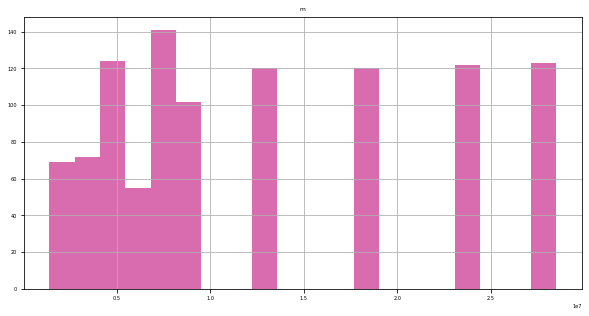

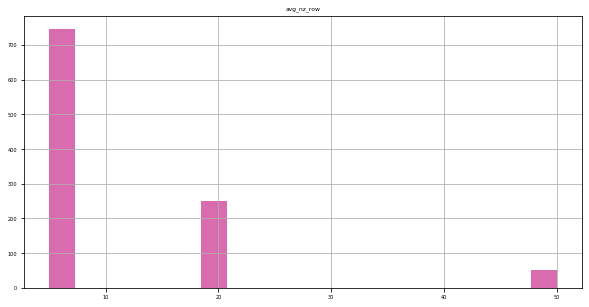

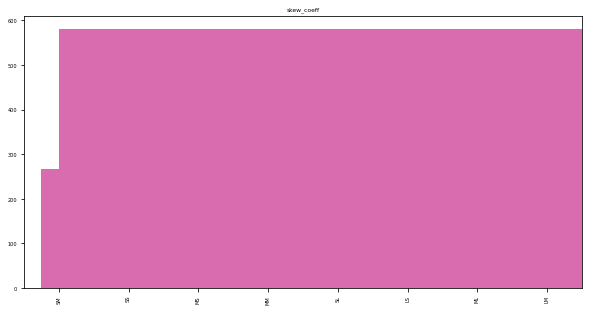

In [104]:
find_bad_features_system('Tesla-V100', 50)

(174, 39)
rows :  5240000 - 28510000
avg_nz_row :  {10.0, 5.0}
skew_coeff :  {0.0, 100.0, 9990.0, 1000.0, 10000.0, 9980.0}
regularity :  {'SS', 'SM', 'MS'}


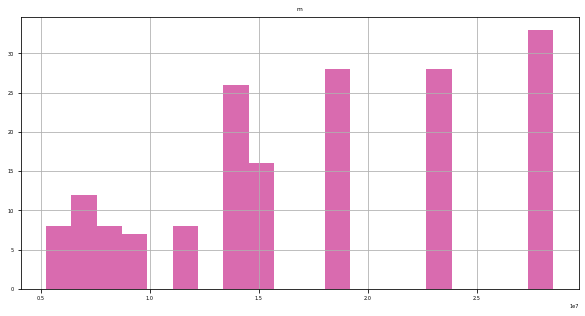

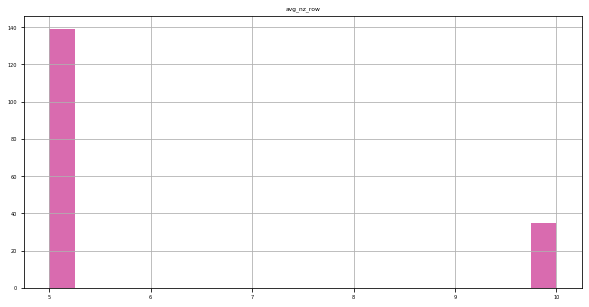

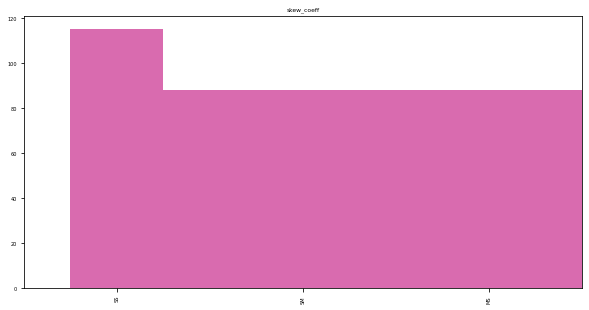

In [105]:
find_bad_features_system('Tesla-A100', 50)

In [106]:
plt.rc('figure', figsize=(width,height))
plt.rcParams["font.size"] = font
plt.rc('font', family='serif', serif='Times', size=font)
#plt.rc('text', usetex=True)  
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('legend', fontsize=font)
plt.rc('axes', labelsize=font)
